In [33]:
# =========================================================
# FULL DATA QUALITY VALIDATION & EDA
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Suppress warnings for clean output
warnings.simplefilter(action='ignore', category=FutureWarning)

# =========================================================
# 1. LOAD DATA
# =========================================================
df = pd.read_csv("fully_featured_materials.csv")
print("Loaded rows:", len(df))
print("Columns available:", df.columns.tolist())

Loaded rows: 150
Columns available: ['material_id', 'material_type', 'material_subtype', 'strength_MPa', 'weight_capacity_kg', 'density_g_per_cm3', 'cost_per_kg_usd', 'biodegradability_score', 'co2_emission_kgCO2_per_kg', 'recyclability_percentage', 'co2_impact_index', 'cost_efficiency_index', 'strength_norm', 'weight_capacity_norm', 'density_norm', 'biodegradability_norm', 'recyclability_norm', 'material_suitability_score']


In [34]:
# =========================================================
# 2. SUMMARY STATISTICS
# =========================================================
print("\n================ DESCRIPTIVE STATISTICS ================")
print(df.describe(include='all'))


================ DESCRIPTIVE STATISTICS ================
        material_id       material_type   material_subtype  strength_MPa  \
count    150.000000                 150                150    150.000000   
unique          NaN                  12                 10           NaN   
top             NaN  Cornstarch Polymer  Bio-based Polymer           NaN   
freq            NaN                  20                 27           NaN   
mean      75.500000                 NaN                NaN      0.497287   
std       43.445368                 NaN                NaN      0.303914   
min        1.000000                 NaN                NaN      0.000000   
25%       38.250000                 NaN                NaN      0.237681   
50%       75.500000                 NaN                NaN      0.510499   
75%      112.750000                 NaN                NaN      0.751472   
max      150.000000                 NaN                NaN      1.000000   

        weight_capacity_kg  d


================ MISSING VALUES ================
material_id                   0
material_type                 0
material_subtype              0
strength_MPa                  0
weight_capacity_kg            0
density_g_per_cm3             0
cost_per_kg_usd               0
biodegradability_score        0
co2_emission_kgCO2_per_kg     0
recyclability_percentage      0
co2_impact_index              0
cost_efficiency_index         0
strength_norm                 0
weight_capacity_norm          0
density_norm                  0
biodegradability_norm         0
recyclability_norm            0
material_suitability_score    0
dtype: int64


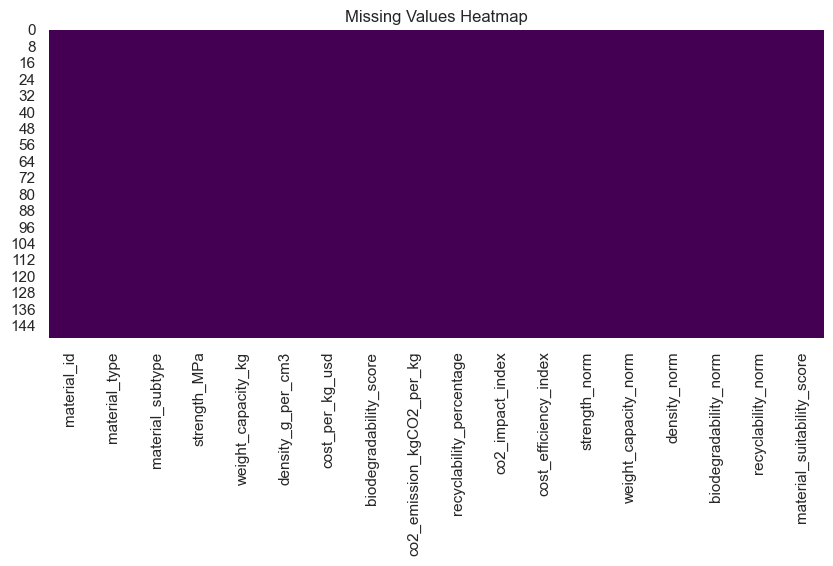

In [35]:

# =========================================================
# 3. MISSING VALUES
# =========================================================
print("\n================ MISSING VALUES ================")
print(df.isnull().sum())

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

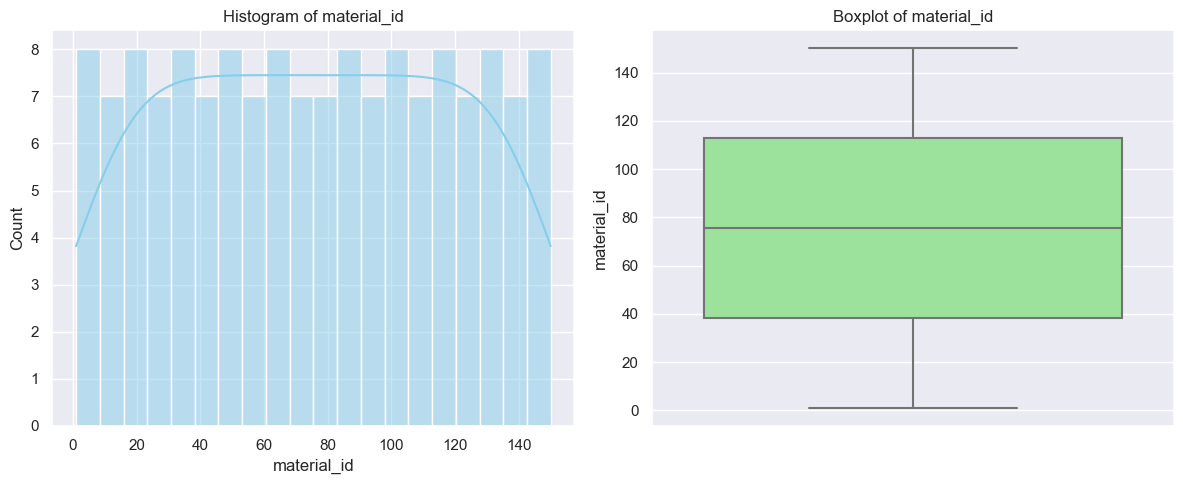

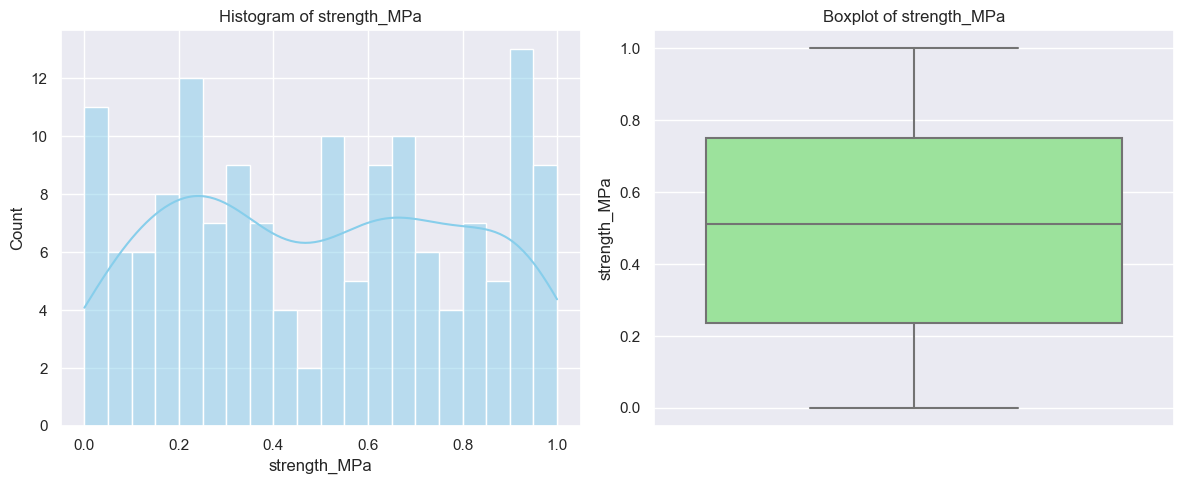

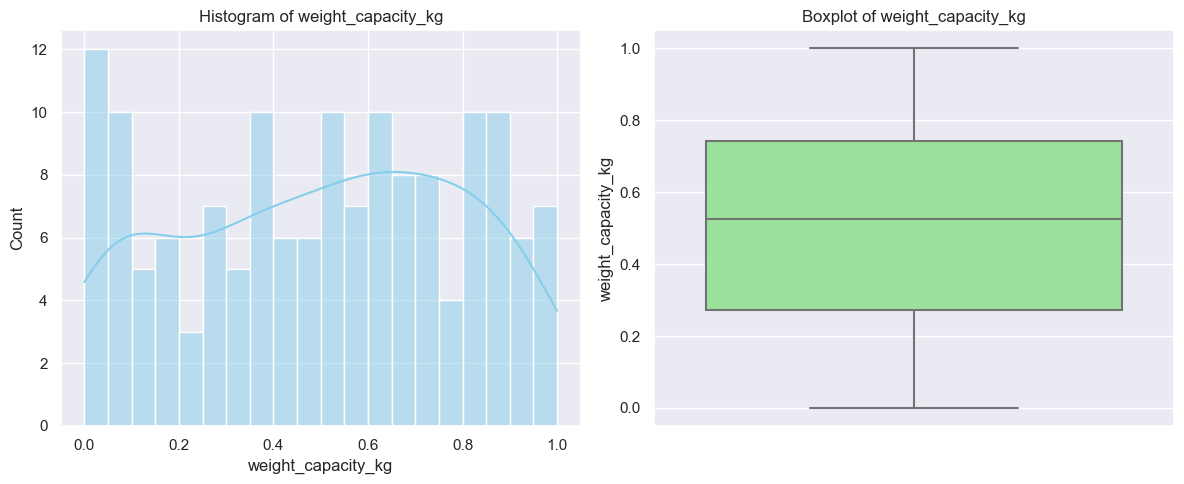

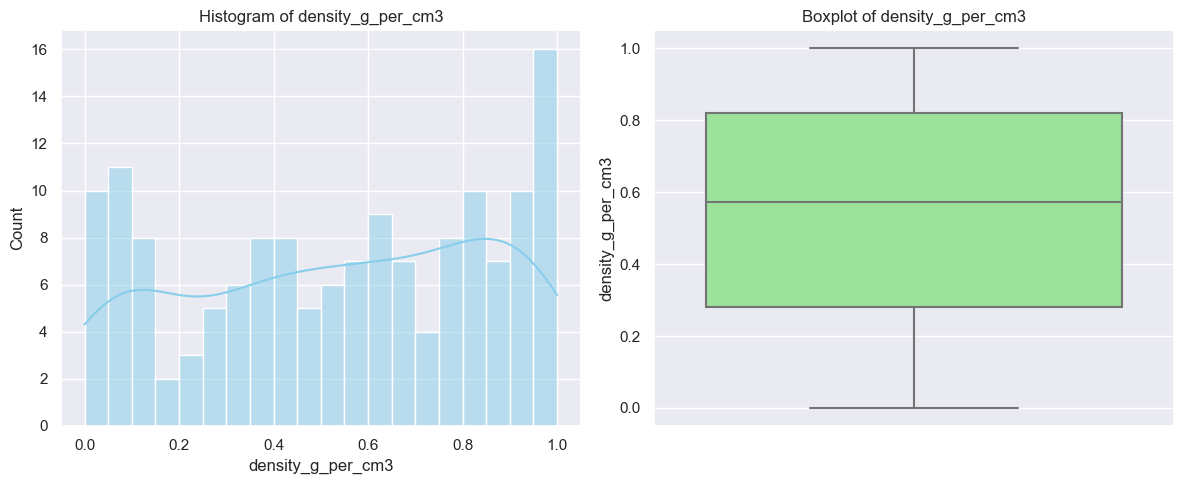

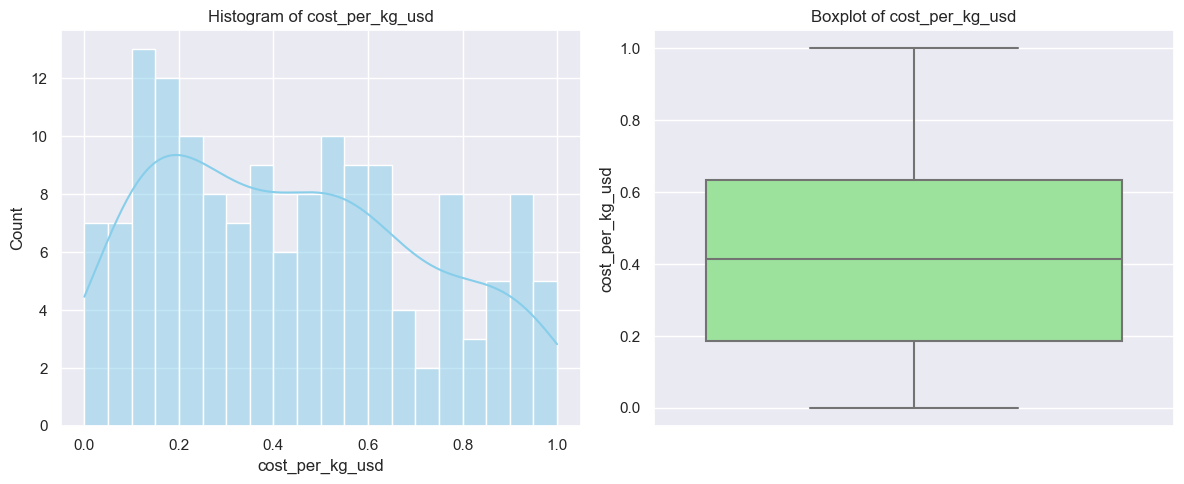

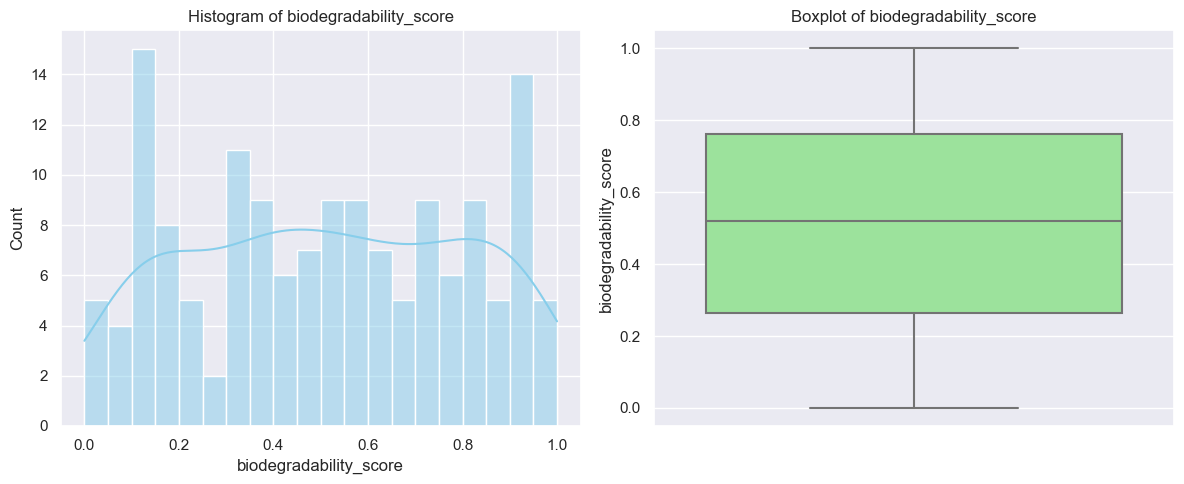

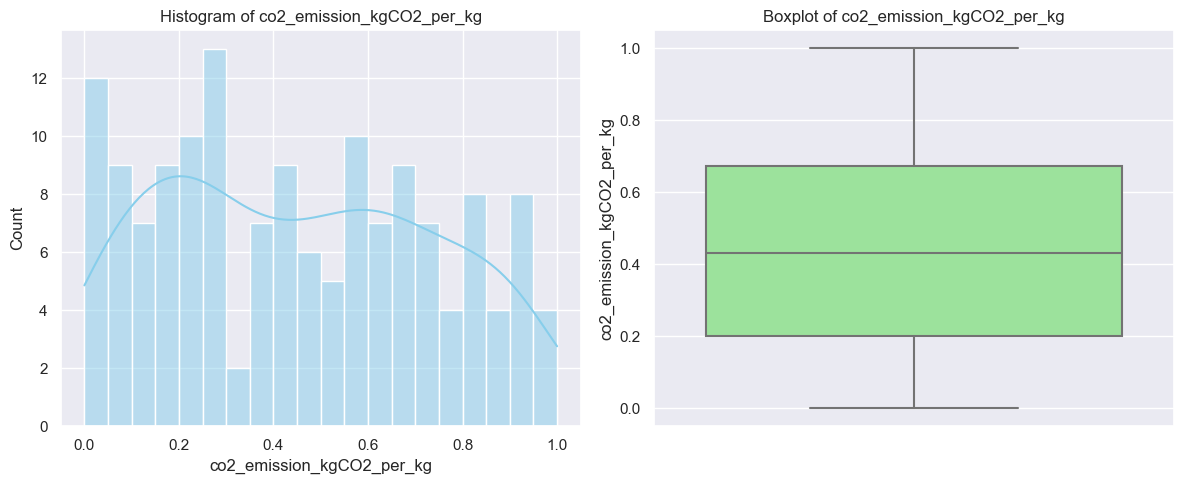

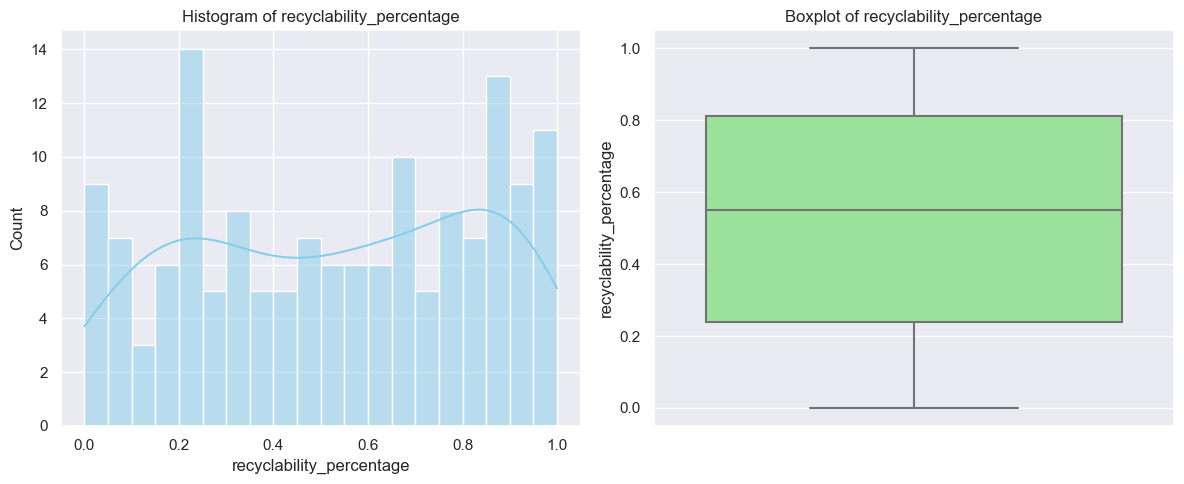

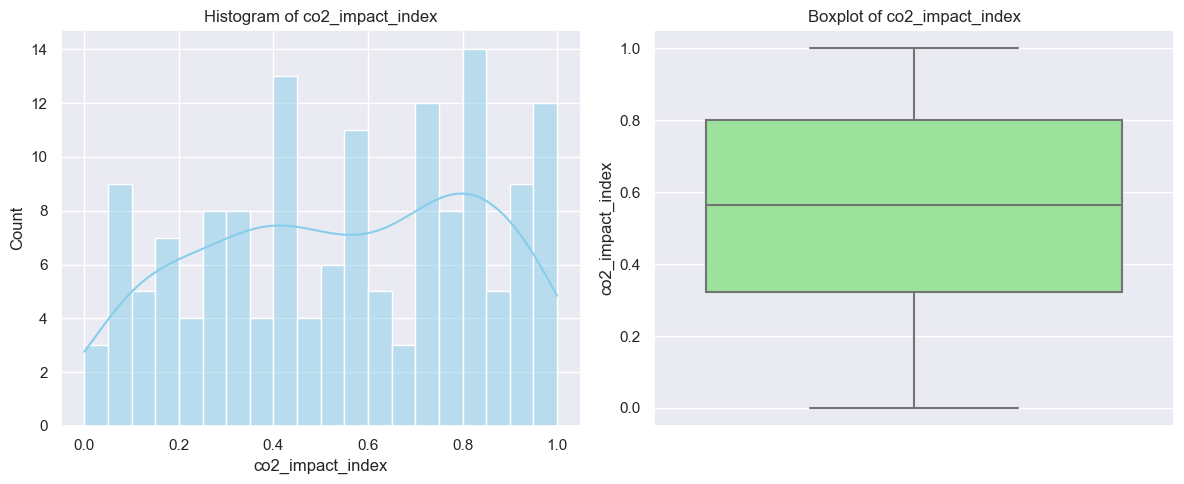

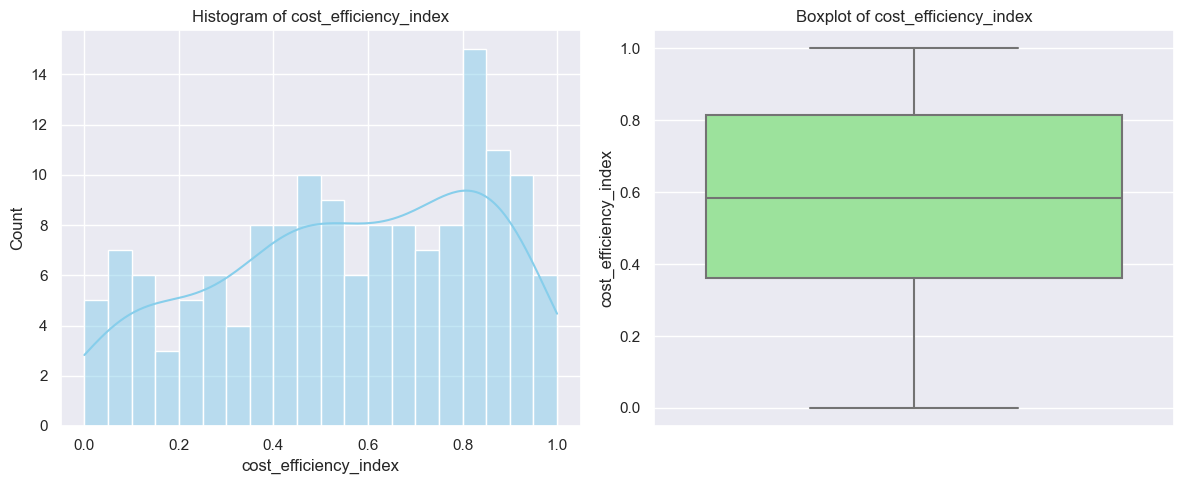

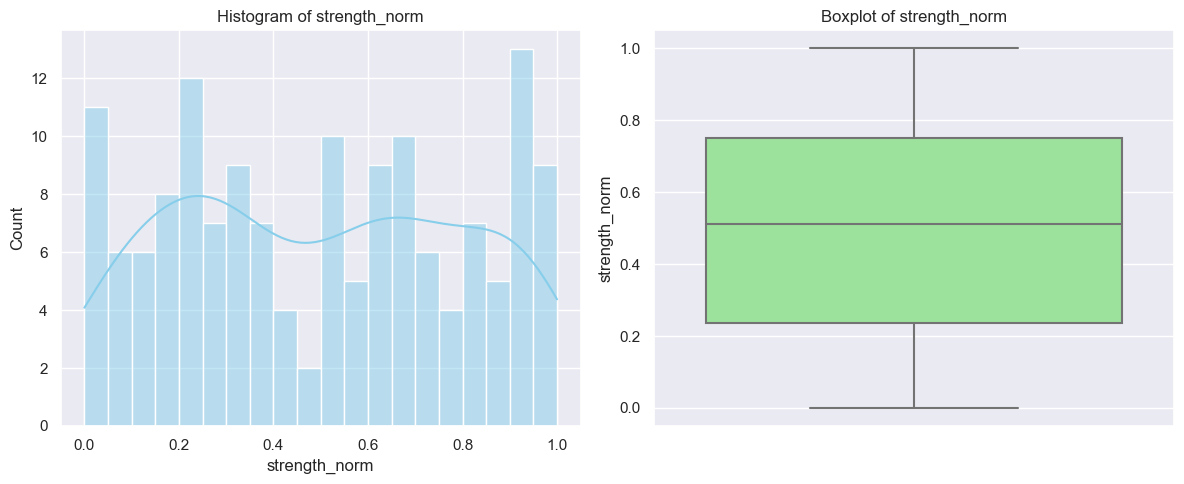

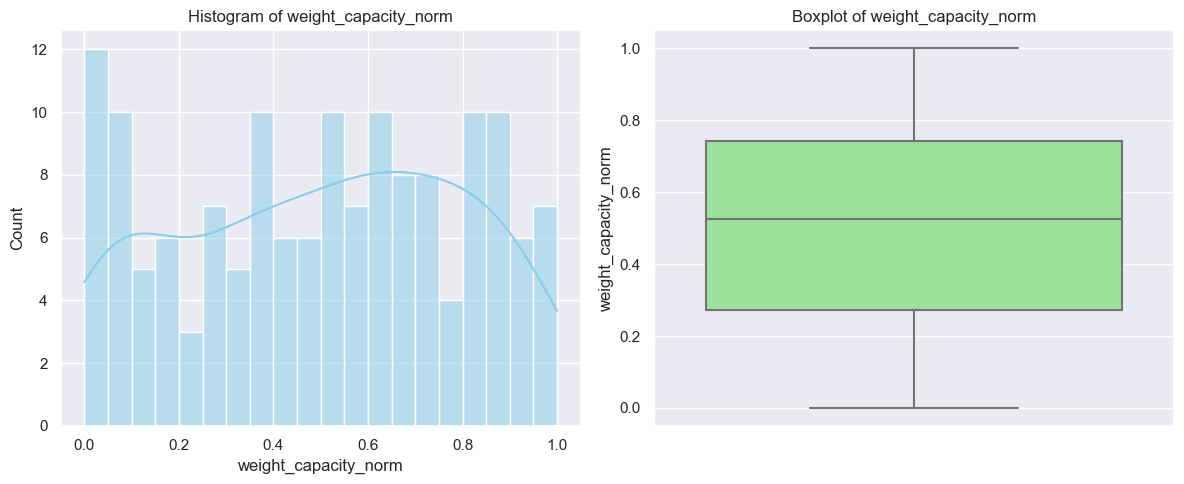

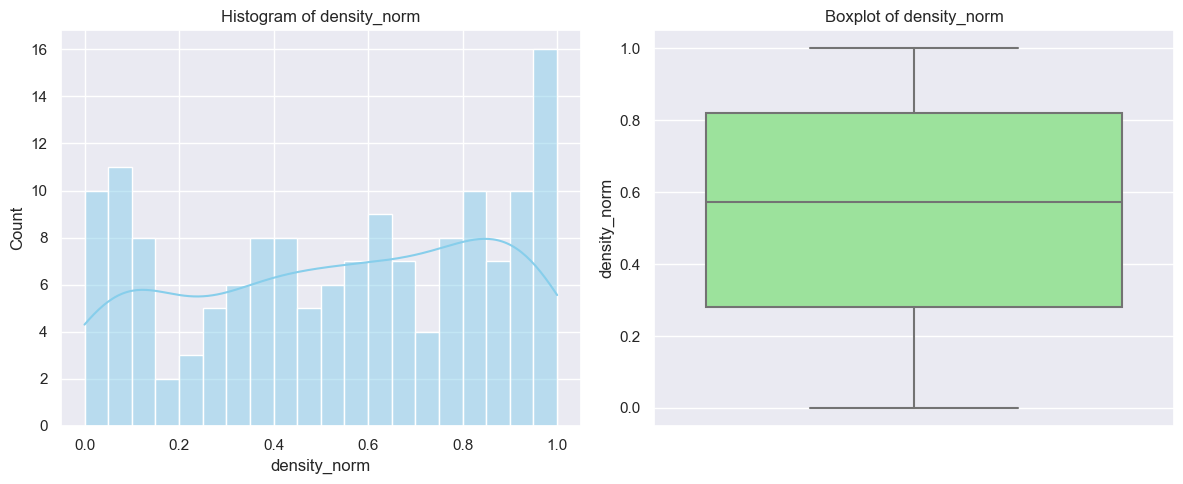

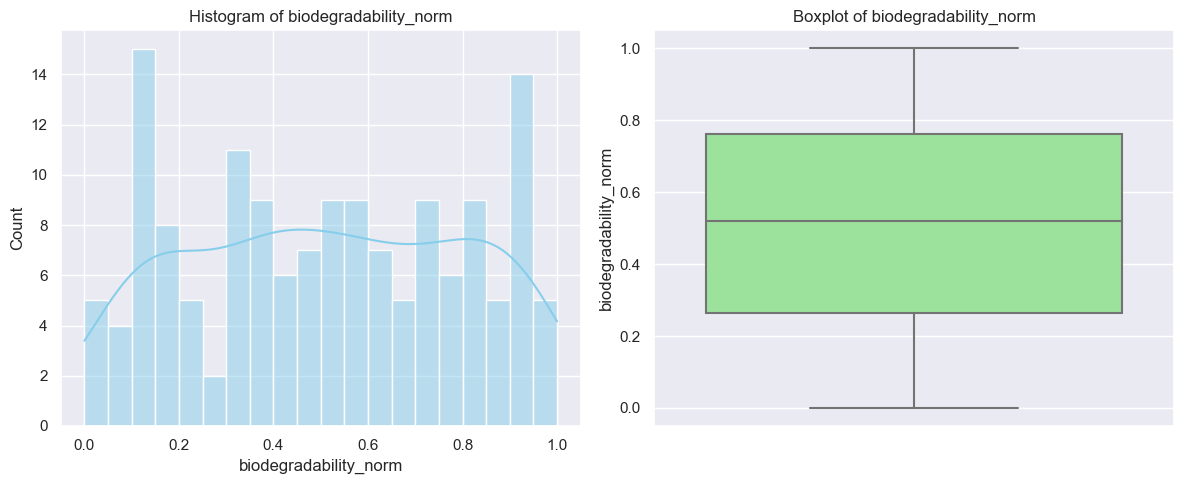

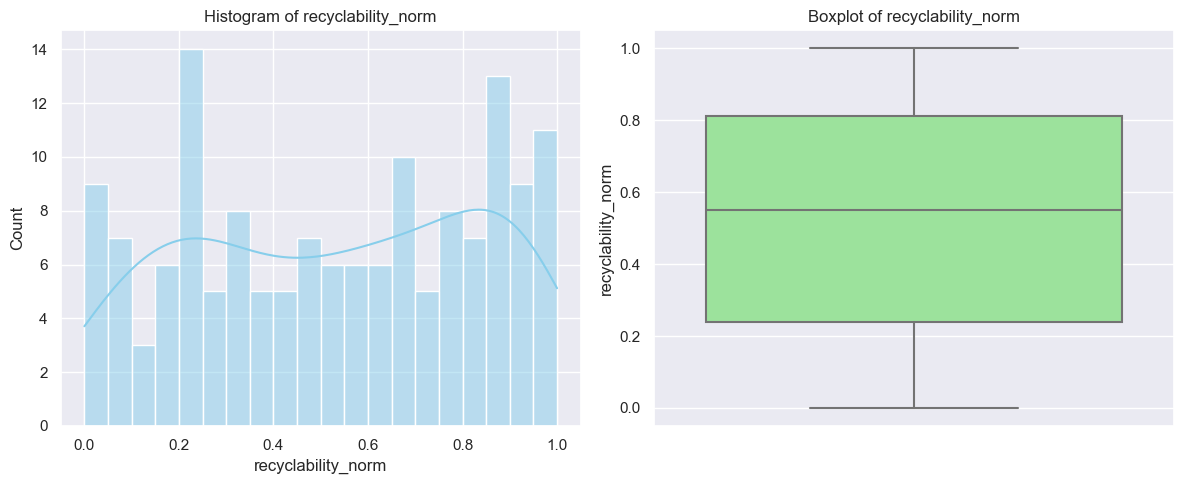

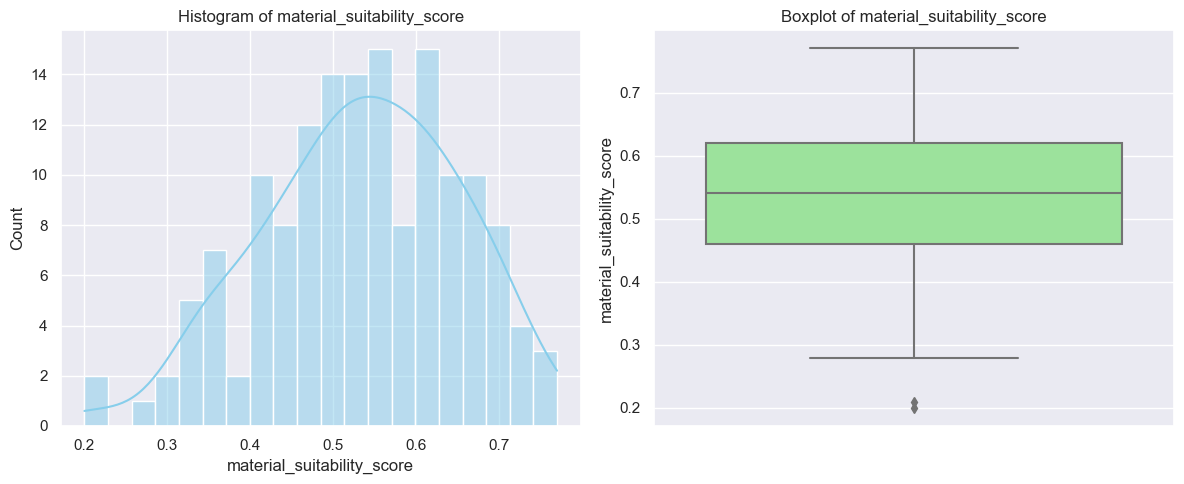

In [ ]:

# =========================================================
# 4. NUMERIC FEATURE DISTRIBUTIONS
# =========================================================
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(12,5))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


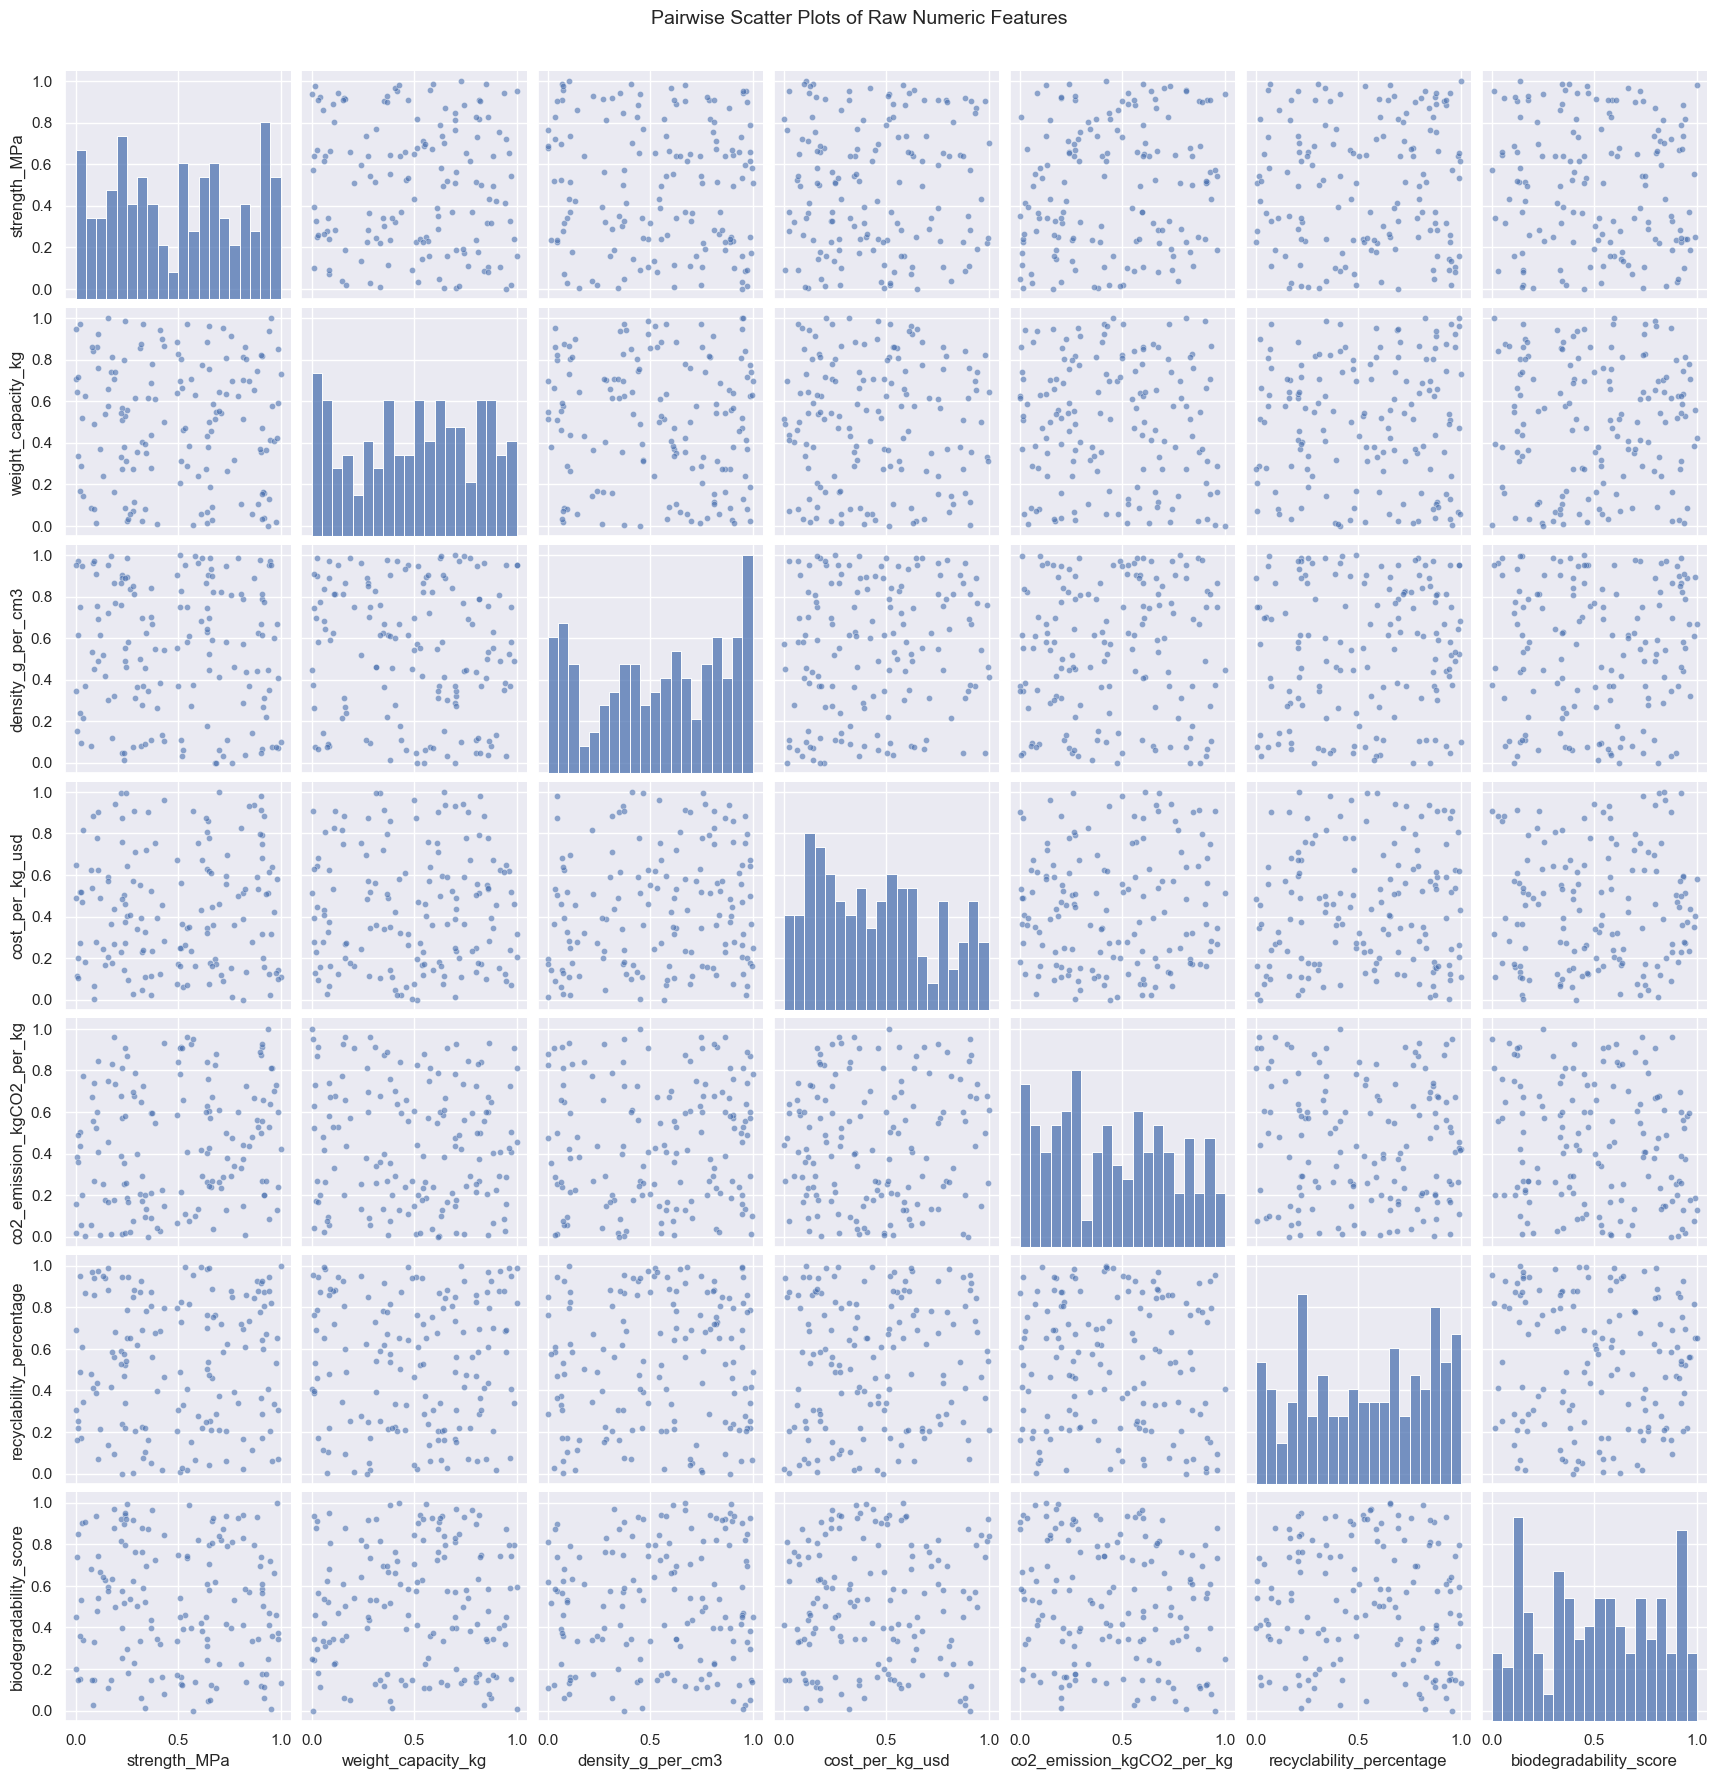

In [37]:


# 5. SCATTER PLOTS (PAIRWISE RAW NUMERIC FEATURES)


import seaborn as sns
import matplotlib.pyplot as plt


# Select ONLY raw numeric features
# (Exclude material_id, normalized & engineered columns)

pairplot_cols = [
    "strength_MPa",
    "weight_capacity_kg",
    "density_g_per_cm3",
    "cost_per_kg_usd",
    "co2_emission_kgCO2_per_kg",
    "recyclability_percentage",
    "biodegradability_score"
]


# Generate pairplot
if len(pairplot_cols) > 1:
    sns.pairplot(
        df[pairplot_cols],
        diag_kind="hist",
        plot_kws={"alpha": 0.6, "s": 20},
        diag_kws={"bins": 20}
    )
    plt.suptitle(
        "Pairwise Scatter Plots of Raw Numeric Features",
        y=1.02,
        fontsize=14
    )
    plt.show()


<Figure size 500x500 with 0 Axes>

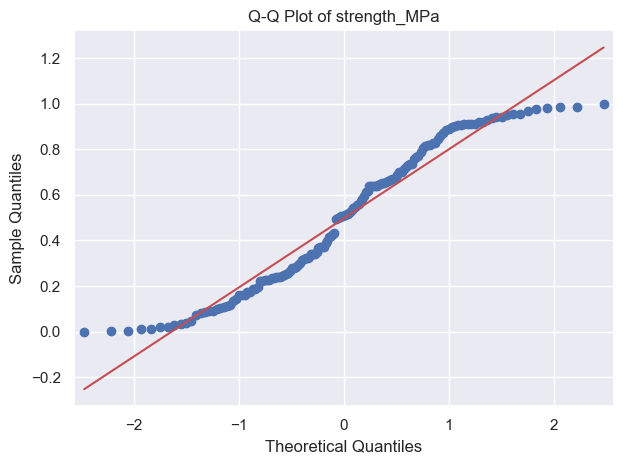

<Figure size 500x500 with 0 Axes>

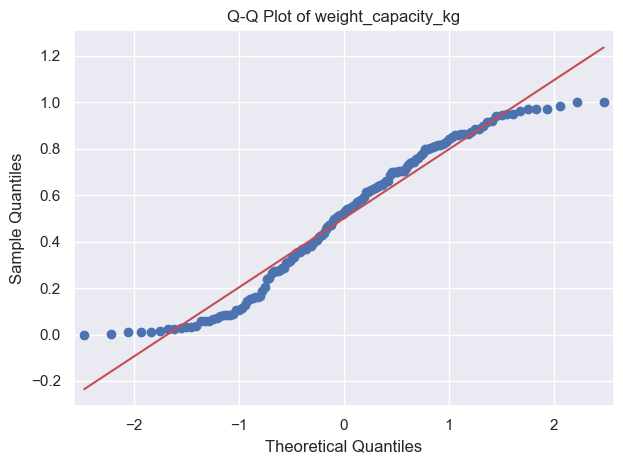

<Figure size 500x500 with 0 Axes>

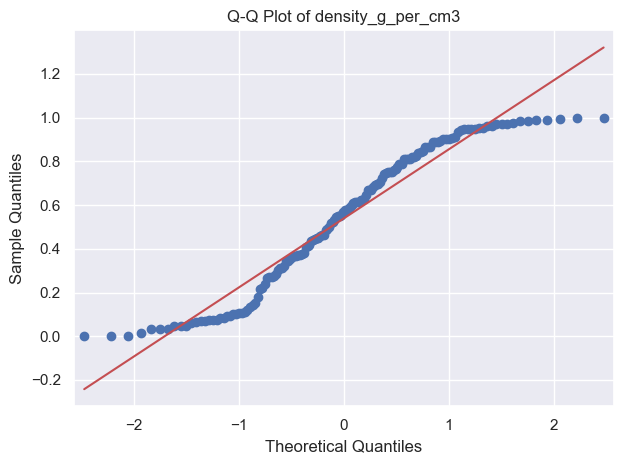

<Figure size 500x500 with 0 Axes>

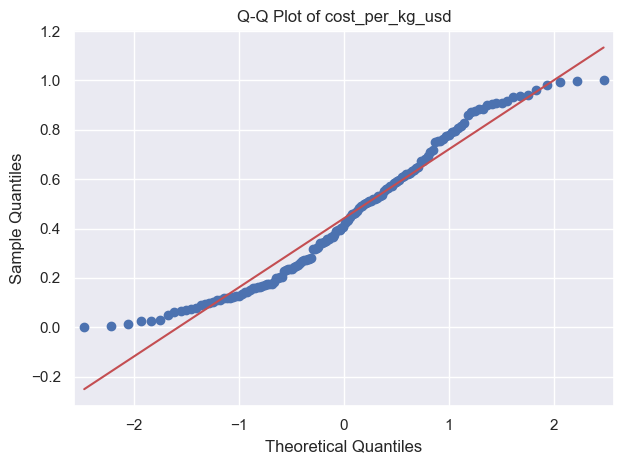

<Figure size 500x500 with 0 Axes>

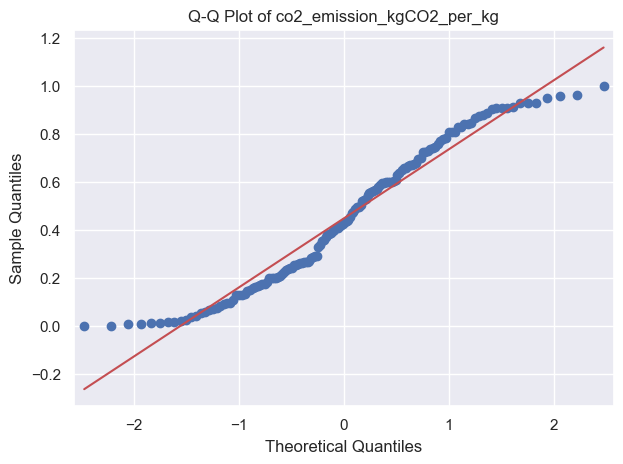

<Figure size 500x500 with 0 Axes>

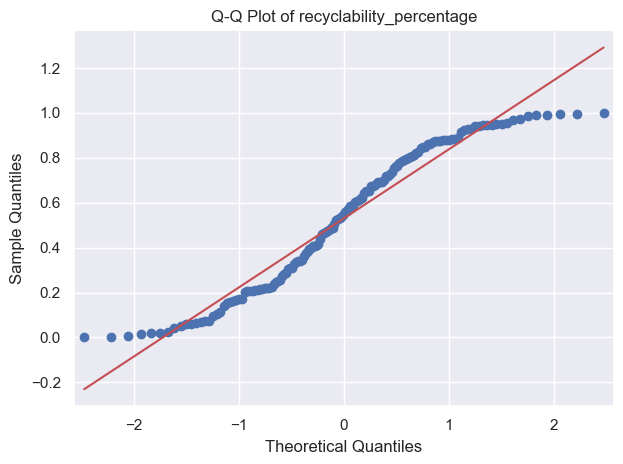

<Figure size 500x500 with 0 Axes>

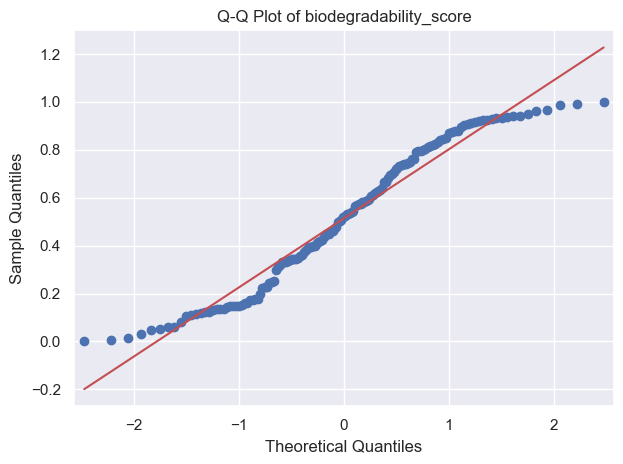

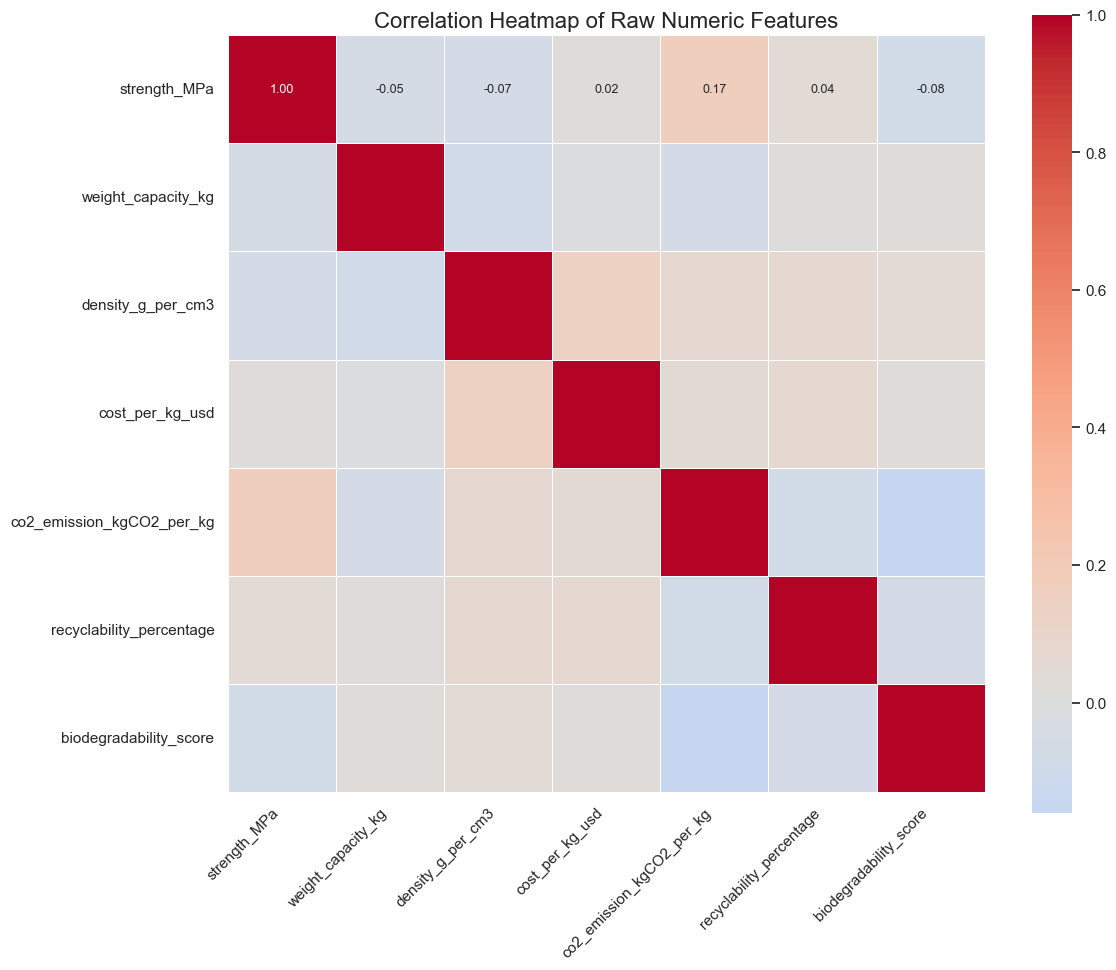

In [38]:
# =========================================================
# 6. Q-Q PLOTS (Normality Check) – Corrected
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ---------------------------------------------------------
# 1. SELECT ONLY RAW NUMERIC FEATURES
#    (Exclude IDs & engineered/normalized features)
# ---------------------------------------------------------
qq_cols = [
    "strength_MPa",
    "weight_capacity_kg",
    "density_g_per_cm3",
    "cost_per_kg_usd",
    "co2_emission_kgCO2_per_kg",
    "recyclability_percentage",
    "biodegradability_score"
]

# ---------------------------------------------------------
# 2. Q-Q PLOTS
# ---------------------------------------------------------
for col in qq_cols:
    if df[col].nunique() > 1:  # skip constant columns
        plt.figure(figsize=(5, 5))
        sm.qqplot(df[col].dropna(), line="s")
        plt.title(f"Q-Q Plot of {col}")
        plt.tight_layout()
        plt.show()


# =========================================================
# 7. CORRELATION HEATMAP (Raw Numeric Features Only)
# =========================================================

# Create correlation dataframe
corr_df = df[qq_cols]

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)

sns.heatmap(
    corr_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 9}
)

plt.title("Correlation Heatmap of Raw Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


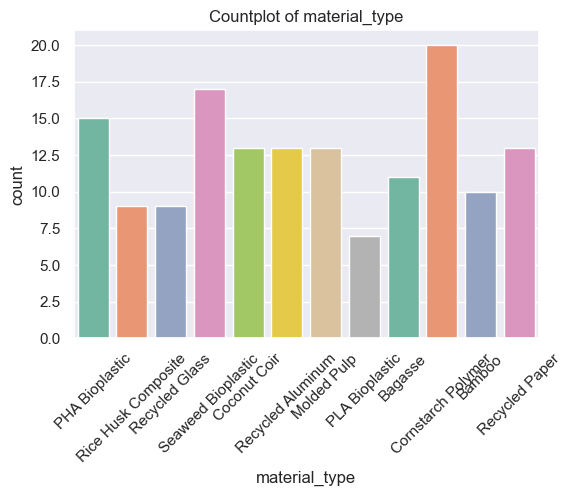

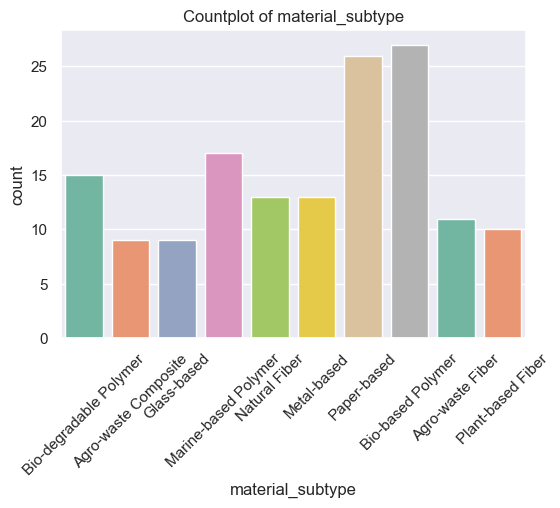

In [ ]:

# =========================================================
# 8. CATEGORICAL FEATURE DISTRIBUTIONS
# =========================================================
# Specify categorical columns explicitly (after encoding)
categorical_cols = ['material_type', 'material_subtype']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


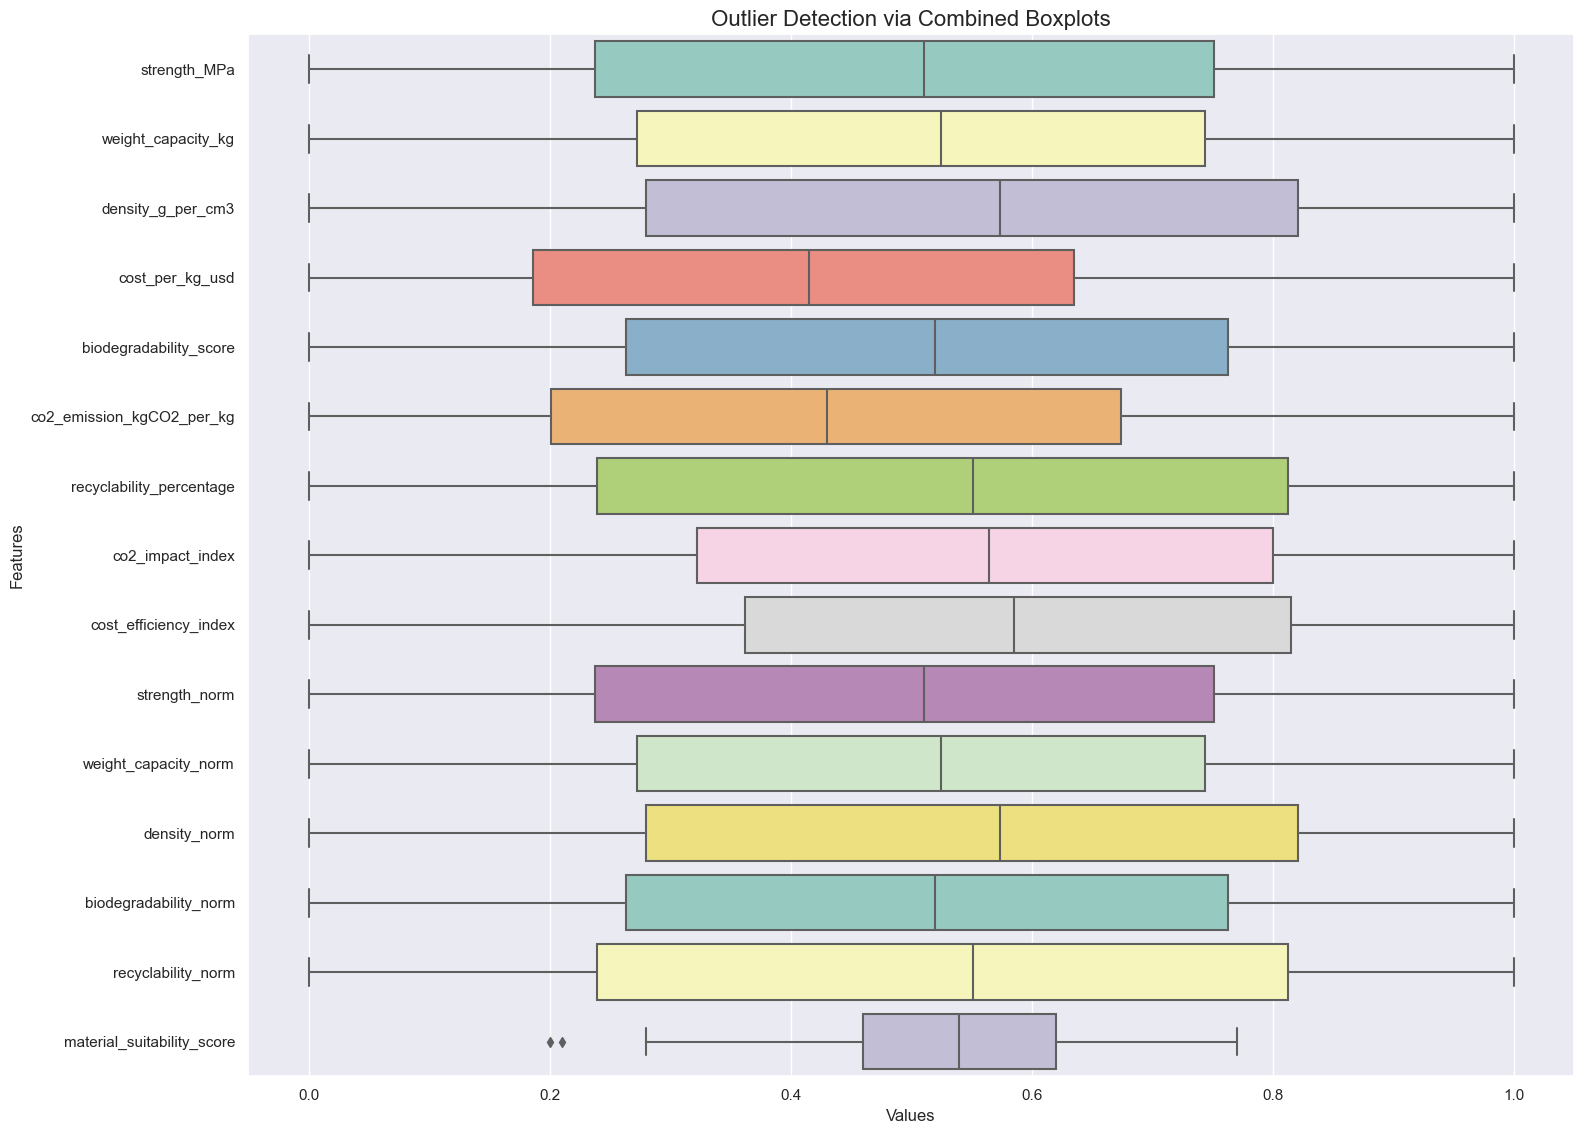

In [40]:
# =========================================================
# 9. OUTLIER DETECTION USING BOXPLOTS (ALL NUMERIC FEATURES)
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Exclude ID columns or non-analytical numeric columns
exclude_cols = ['material_id']  # add any other ID-like columns if needed
numeric_features = [col for col in numeric_cols if col not in exclude_cols]

# Plot
plt.figure(figsize=(16, len(numeric_features)*0.5 + 4))
sns.boxplot(data=df[numeric_features], orient="h", palette="Set3")
plt.title("Outlier Detection via Combined Boxplots", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


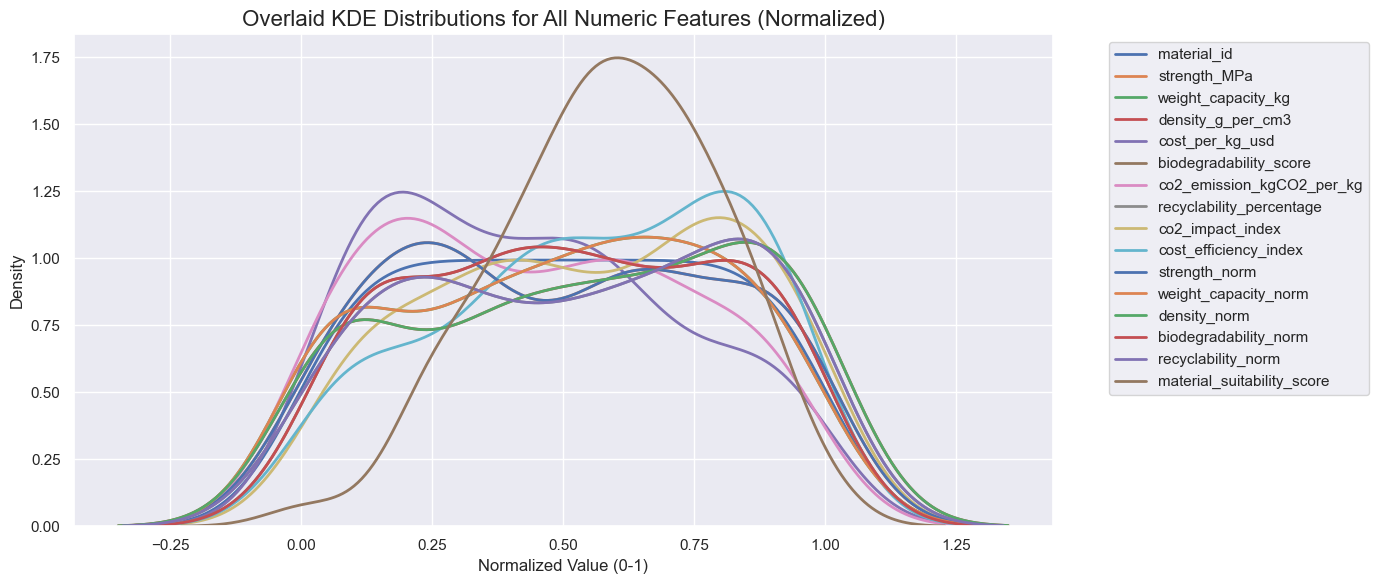

In [41]:
# =========================================================
# 10. DISTRIBUTION OVERLAY PLOTS (Normalized, Using KDE)
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns with more than 1 unique value
numeric_cols_filtered = [col for col in numeric_cols if df[col].nunique() > 1]

# Min-Max normalization
scaler = MinMaxScaler()
df_scaled = df[numeric_cols_filtered].fillna(0)  # fill NaNs with 0 for plotting
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=numeric_cols_filtered)

plt.figure(figsize=(14,6))
for col in numeric_cols_filtered:
    sns.kdeplot(df_scaled[col], label=col, linewidth=2)

plt.title("Overlaid KDE Distributions for All Numeric Features (Normalized)", fontsize=16)
plt.xlabel("Normalized Value (0-1)")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()


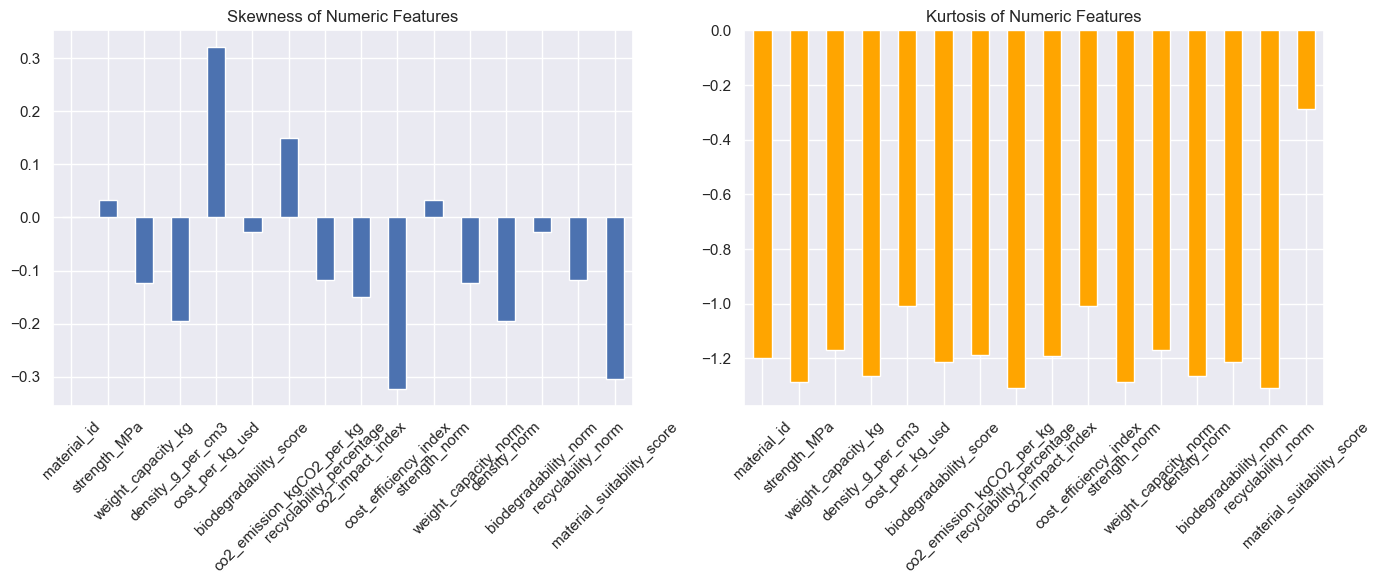

In [42]:

# =========================================================
# 11. SKEWNESS & KURTOSIS BARCHART
# =========================================================

import numpy as np

skew_vals = df[numeric_cols].skew()
kurt_vals = df[numeric_cols].kurtosis()

plt.figure(figsize=(14,6))

# Skewness
plt.subplot(1,2,1)
skew_vals.plot(kind='bar')
plt.title("Skewness of Numeric Features")
plt.xticks(rotation=45)

# Kurtosis
plt.subplot(1,2,2)
kurt_vals.plot(kind='bar', color='orange')
plt.title("Kurtosis of Numeric Features")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Clear any leftover figures (prevents blank/ghost figures)
plt.close("all")

material_id                   0
strength_MPa                  0
weight_capacity_kg            0
density_g_per_cm3             0
cost_per_kg_usd               0
biodegradability_score        0
co2_emission_kgCO2_per_kg     0
recyclability_percentage      0
co2_impact_index              0
cost_efficiency_index         0
strength_norm                 0
weight_capacity_norm          0
density_norm                  0
biodegradability_norm         0
recyclability_norm            0
material_suitability_score    0
dtype: int64


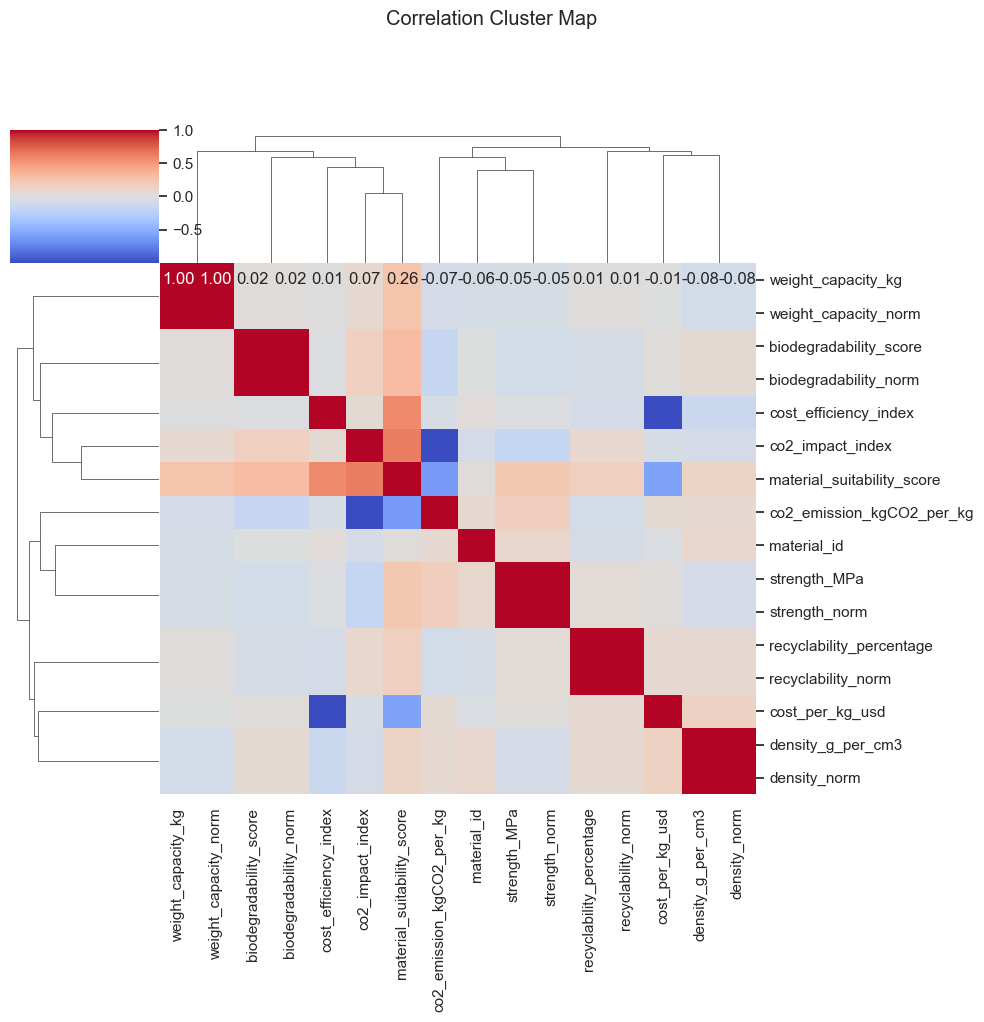

In [43]:

# -------- 12. CORRELATION CLUSTER MAP (fixed) ----------
# Don't call plt.figure() before clustermap — clustermap creates its own Figure.
# Use the returned ClusterGrid to set title/adjust spacing.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Check for NaN values
print(corr_matrix.isnull().sum())  # make sure no NaN

# 4. Plot clustermap
cg = sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", figsize=(10,10))
cg.fig.suptitle("Correlation Cluster Map", y=1.02)
cg.fig.subplots_adjust(top=0.90)
plt.show()



In [44]:

# =========================================================
# 13. FEATURE VS TARGET RELATIONSHIP (If target exists)
# =========================================================

if "target" in df.columns:
    for col in numeric_cols:
        if col != "target":
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=df[col], y=df["target"])
            plt.title(f"{col} vs Target")
            plt.show()


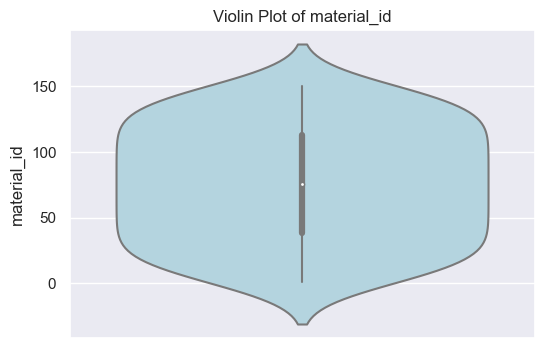

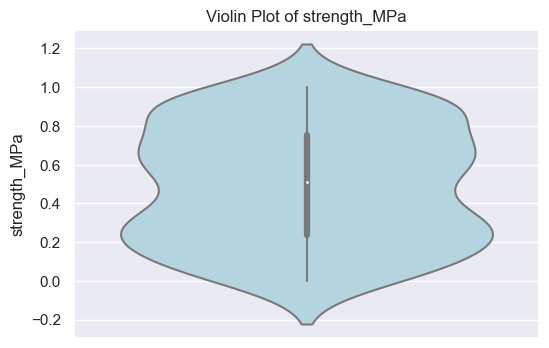

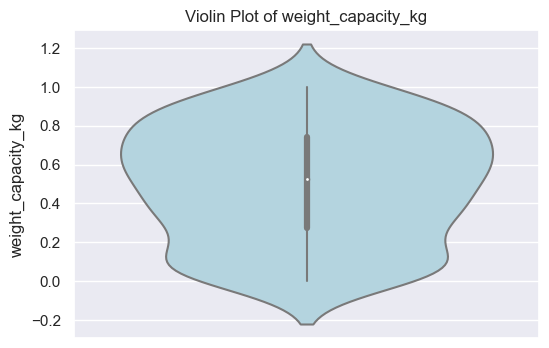

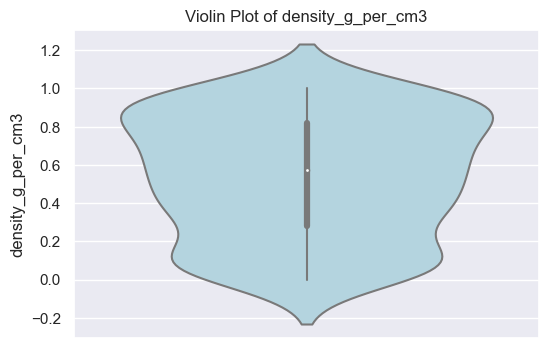

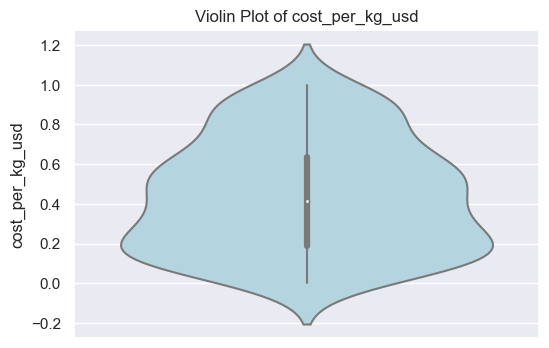

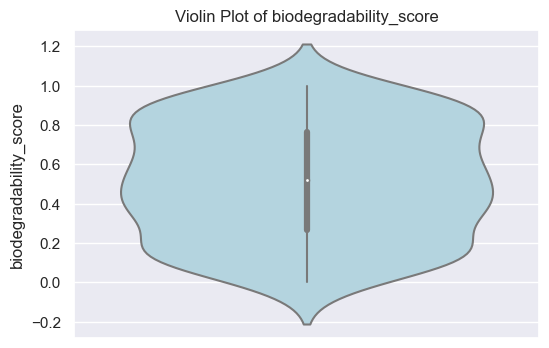

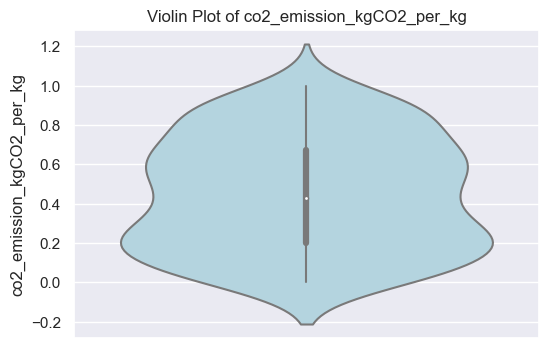

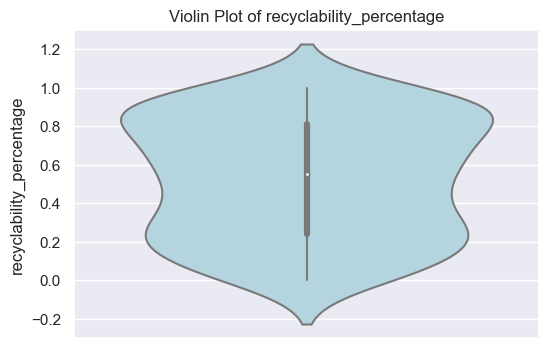

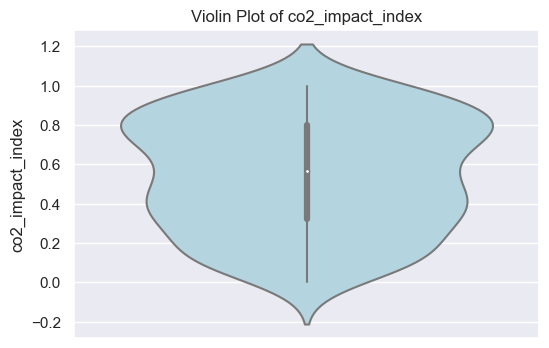

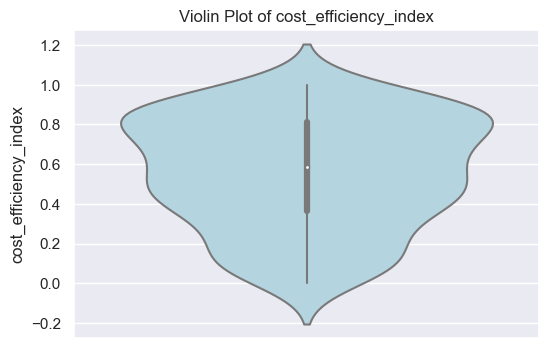

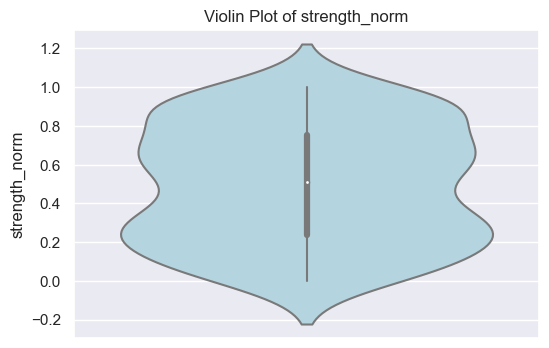

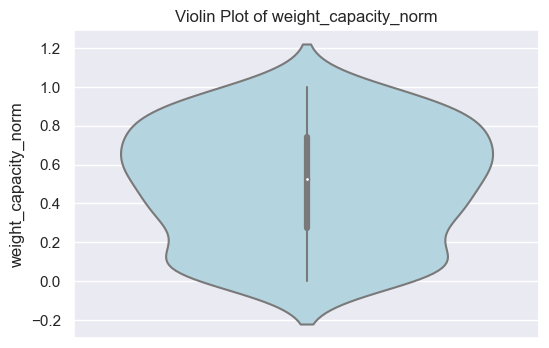

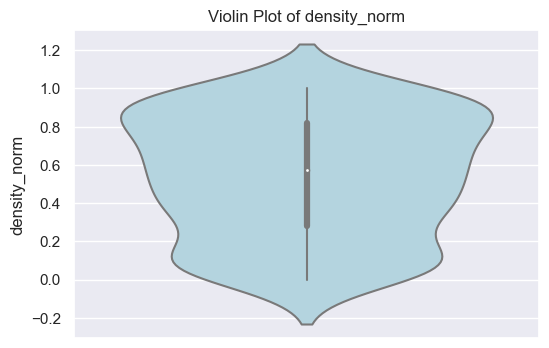

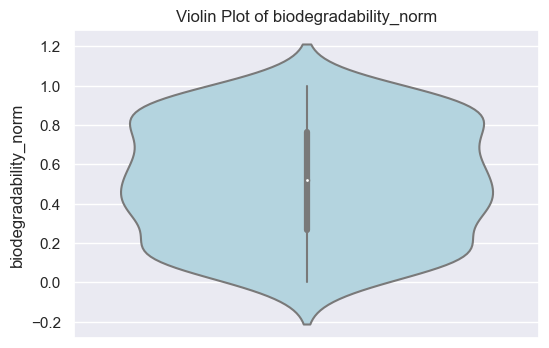

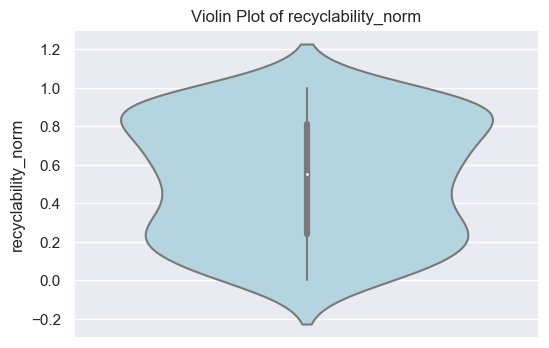

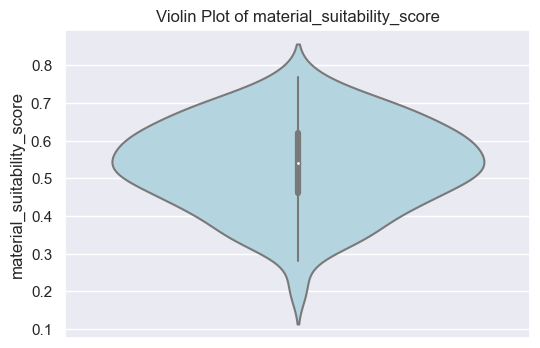

In [45]:

# =========================================================
# 14. VIOLIN PLOTS FOR SPREAD & DENSITY
# =========================================================

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=df[col], color="lightblue")
    plt.title(f"Violin Plot of {col}")
    plt.show()


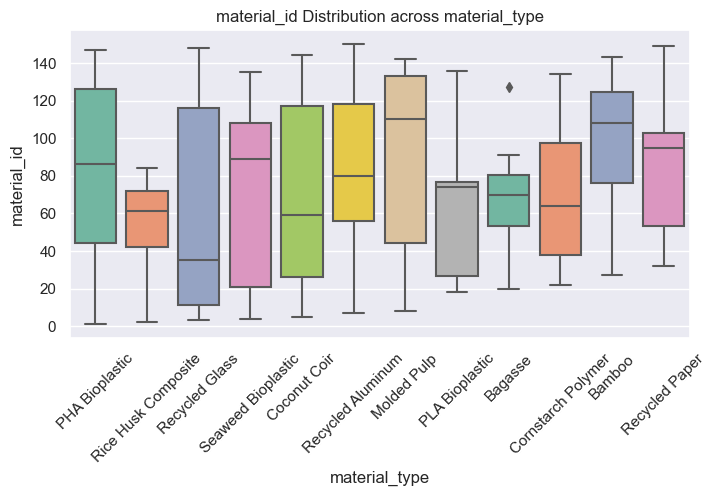

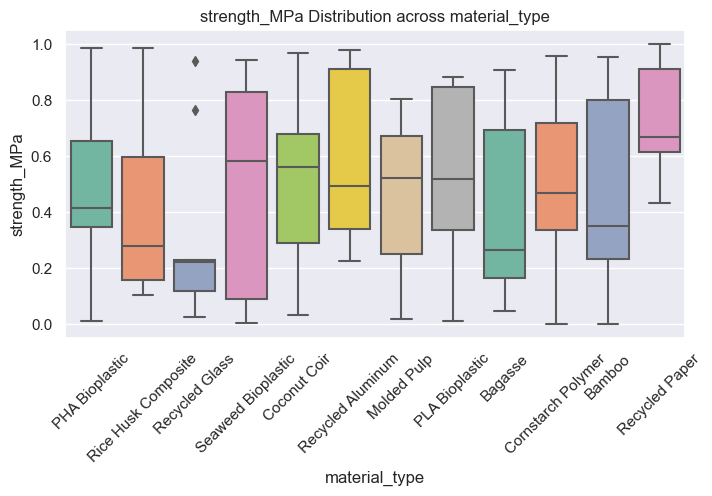

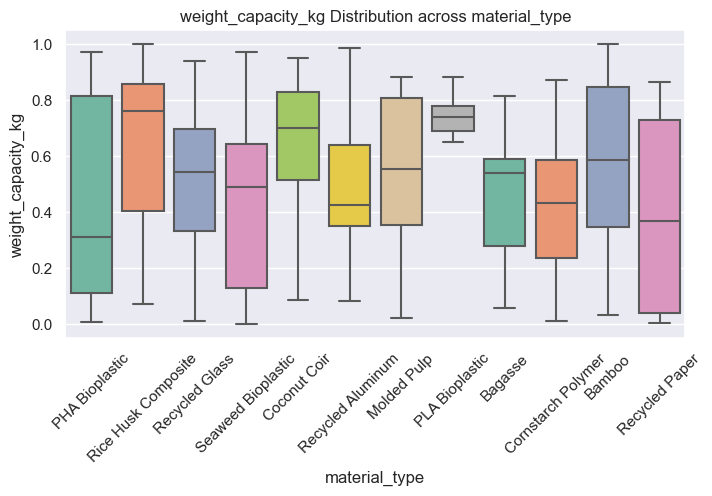

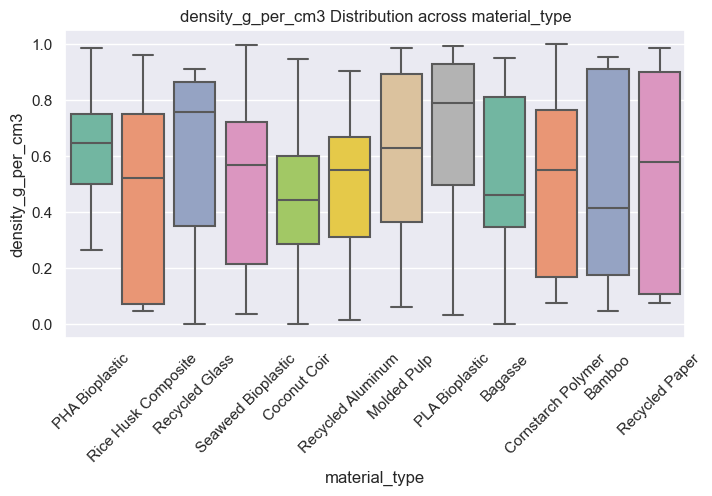

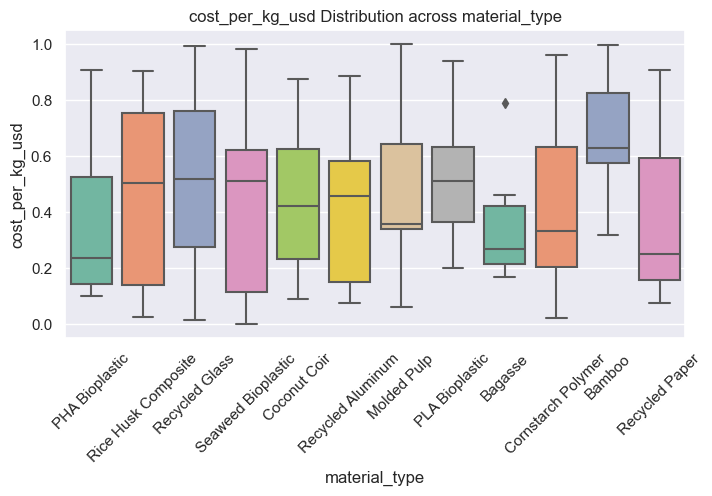

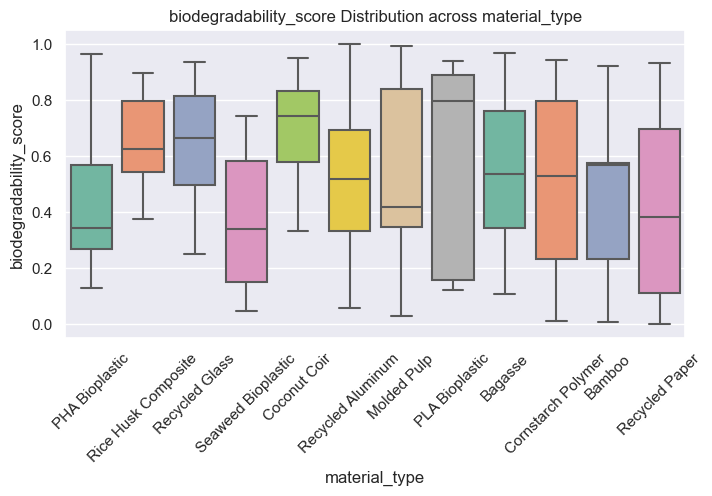

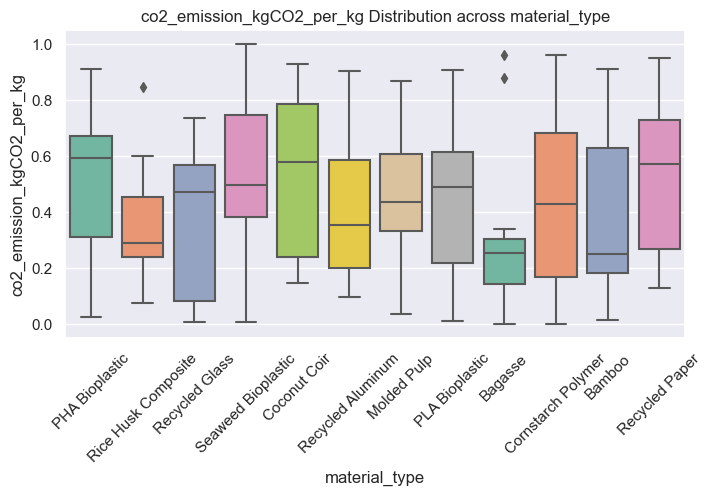

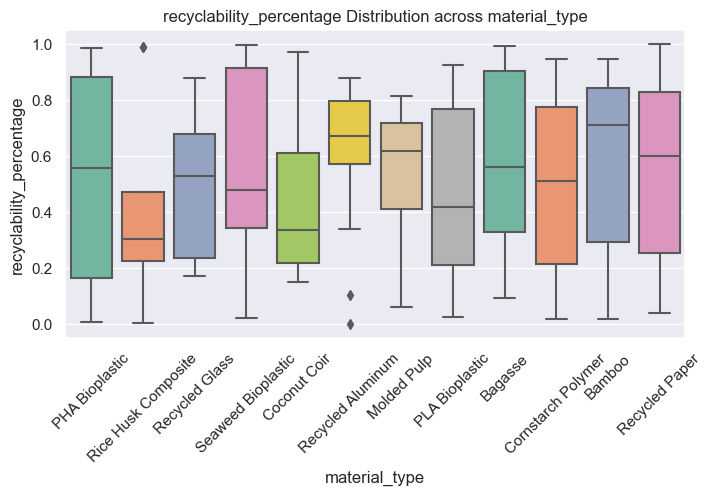

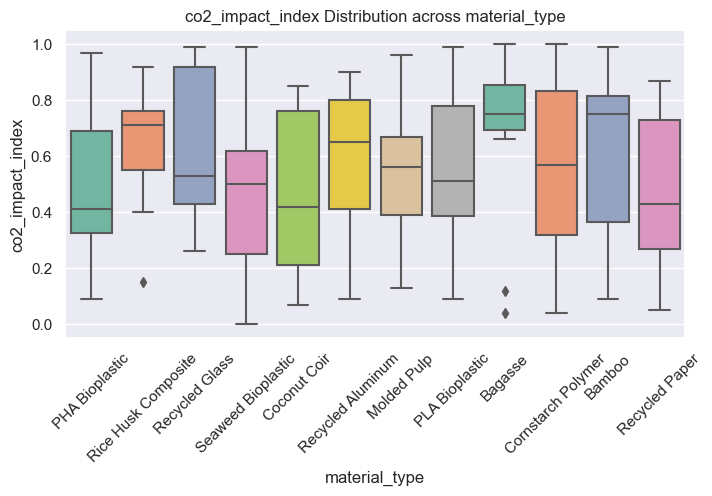

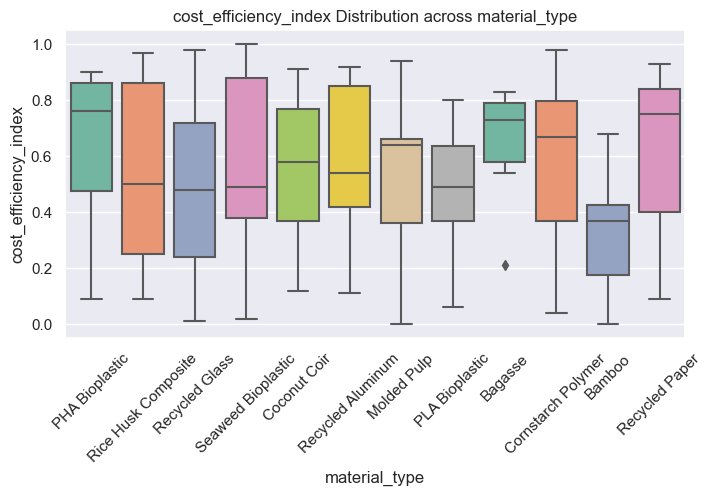

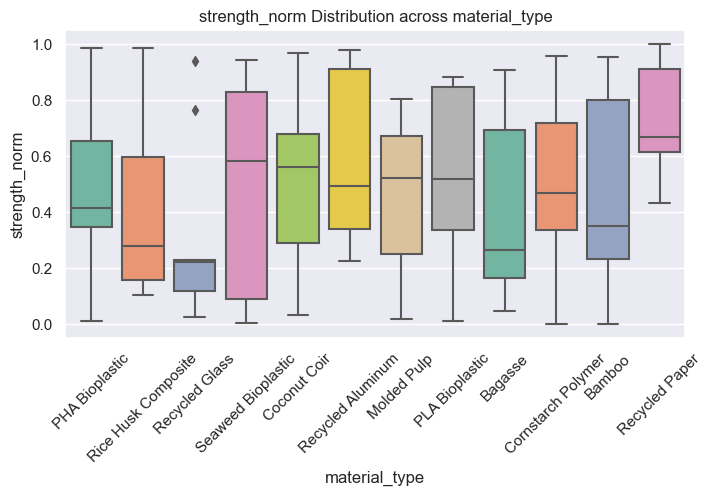

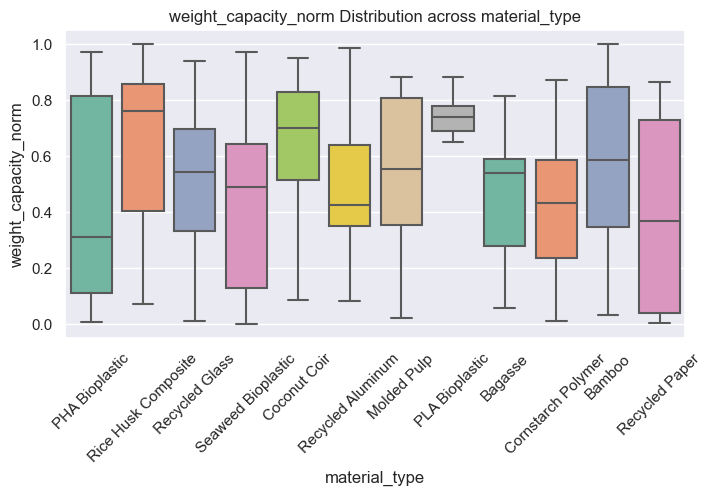

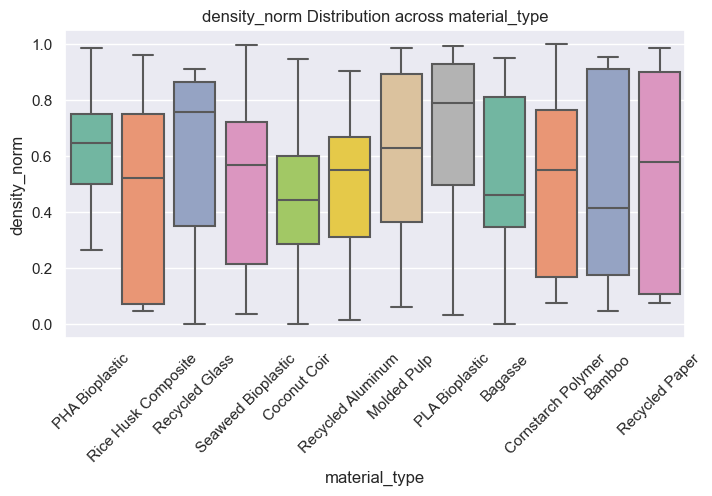

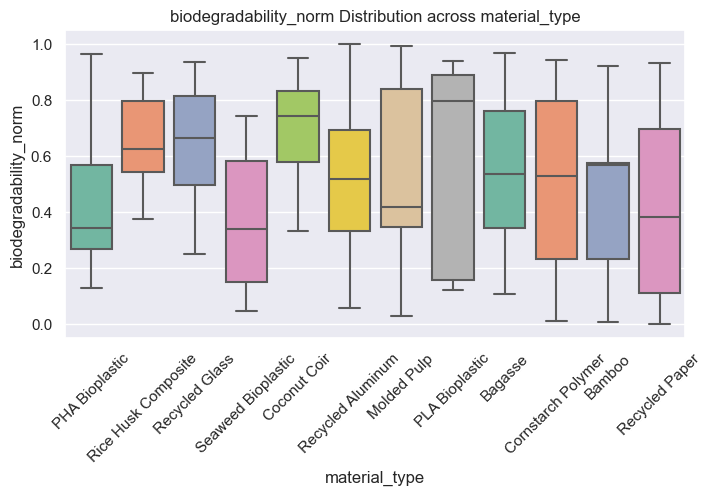

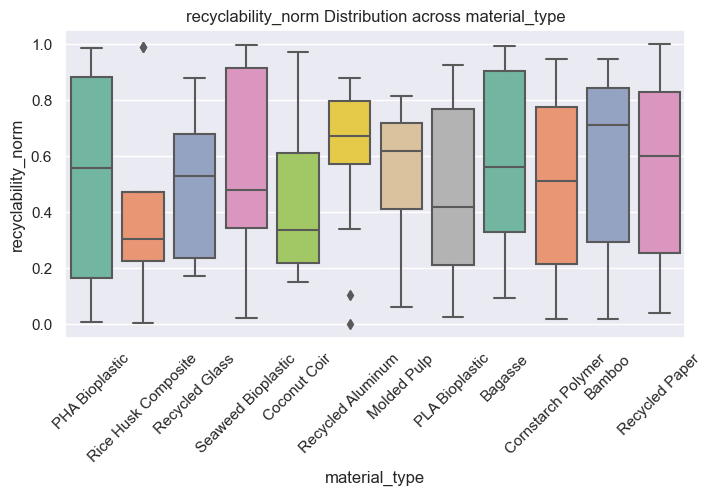

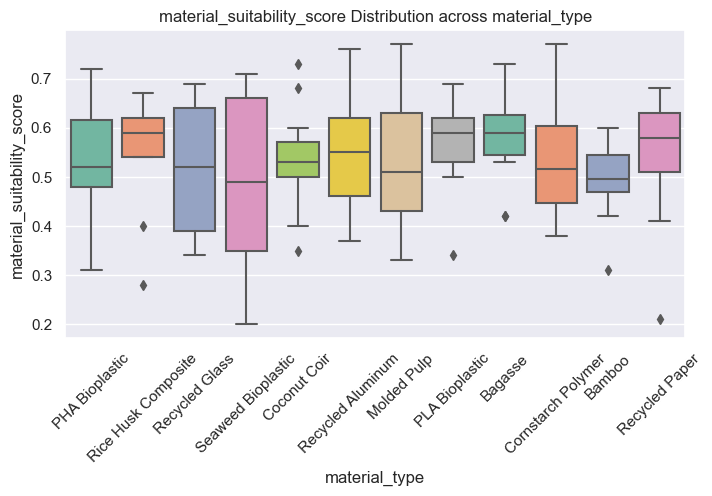

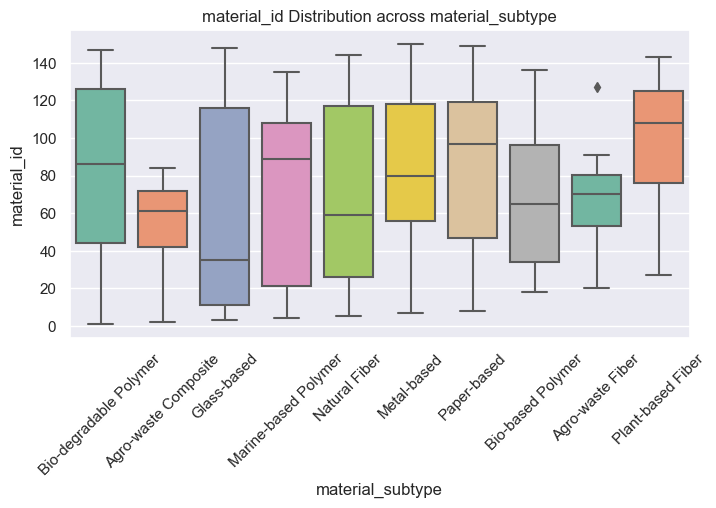

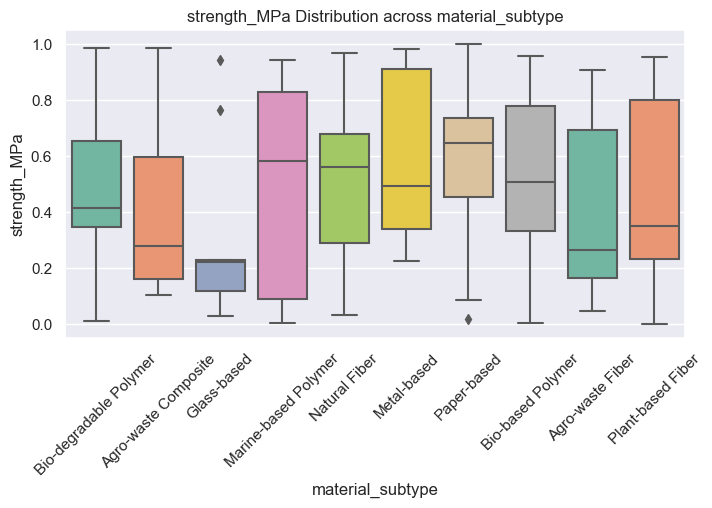

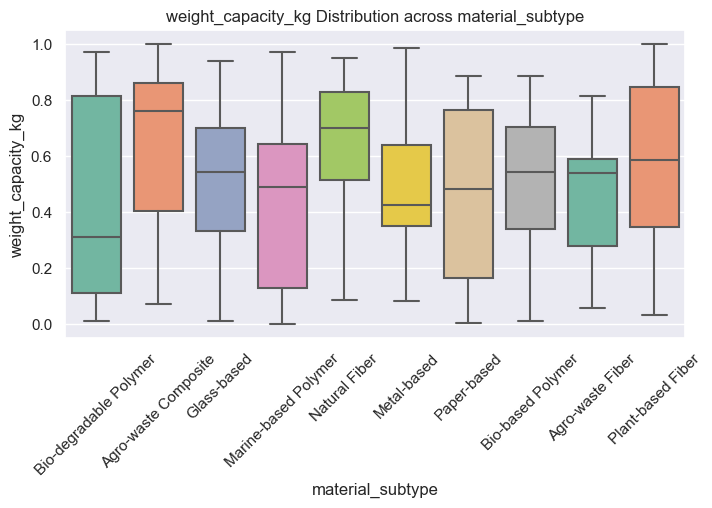

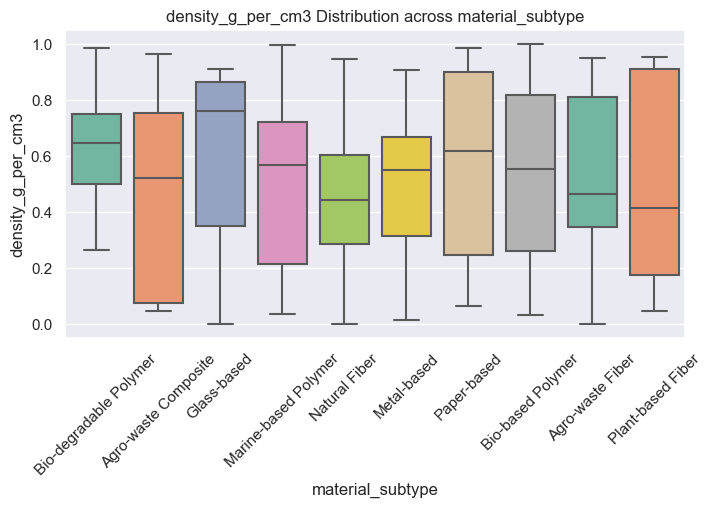

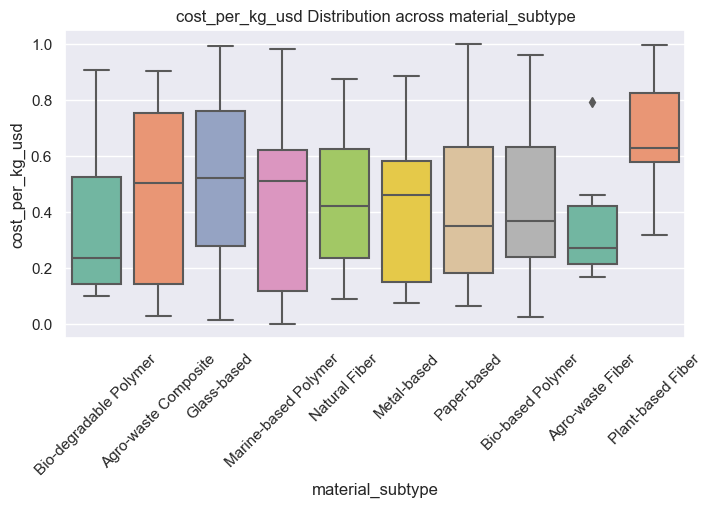

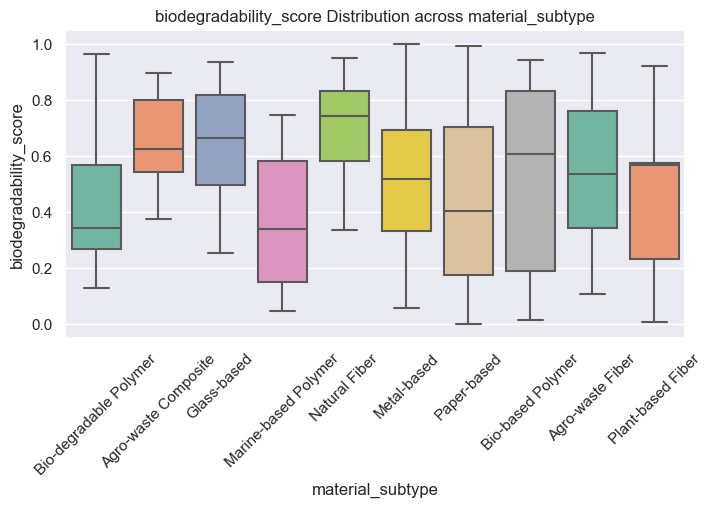

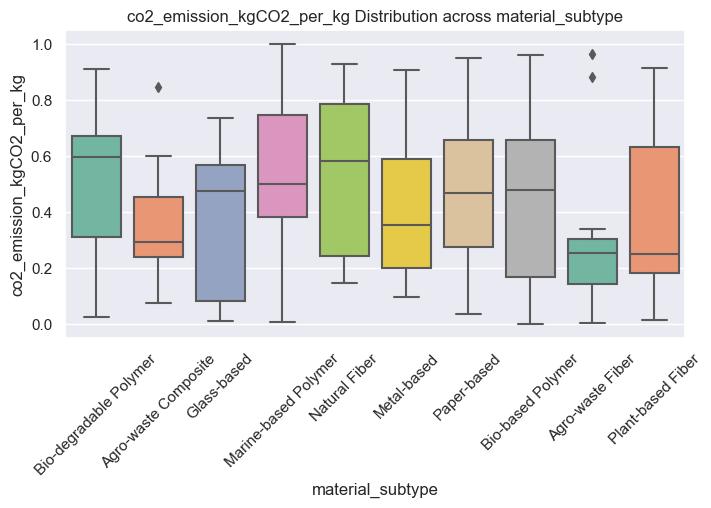

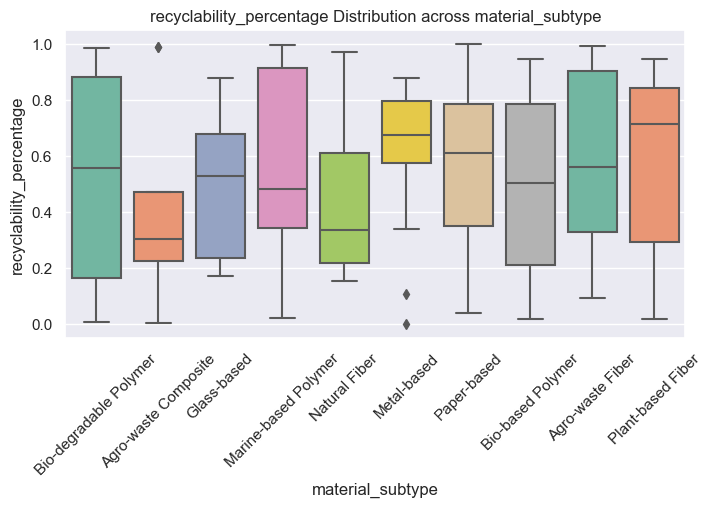

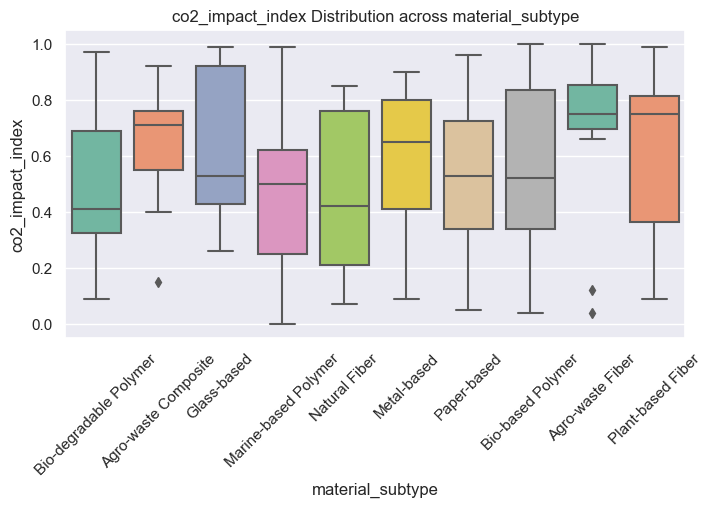

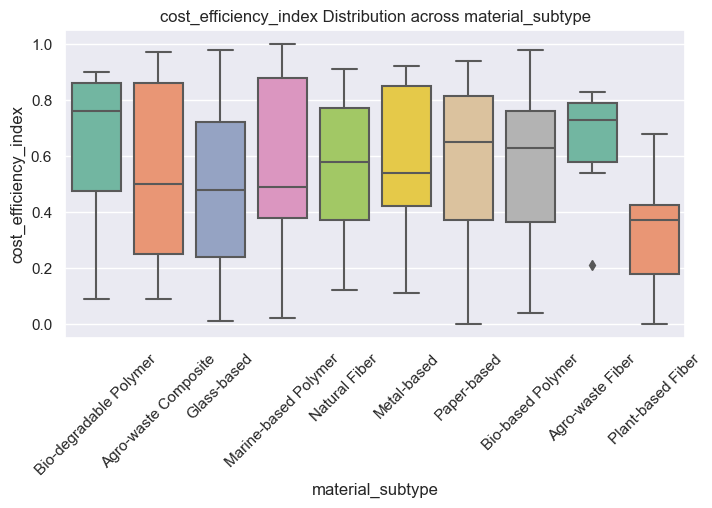

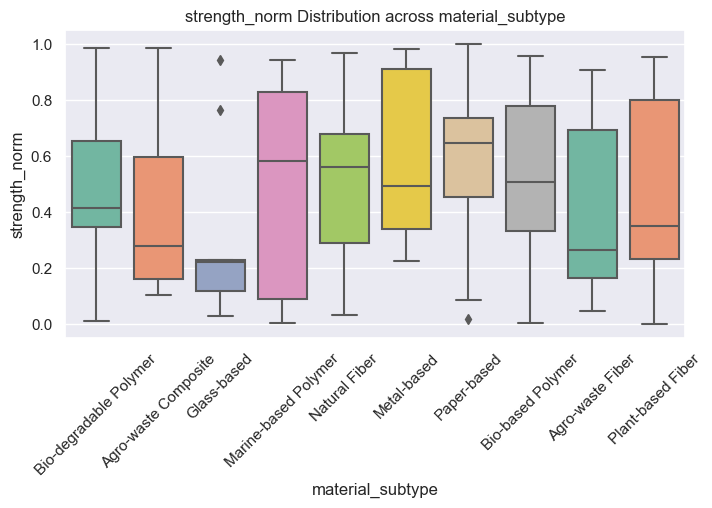

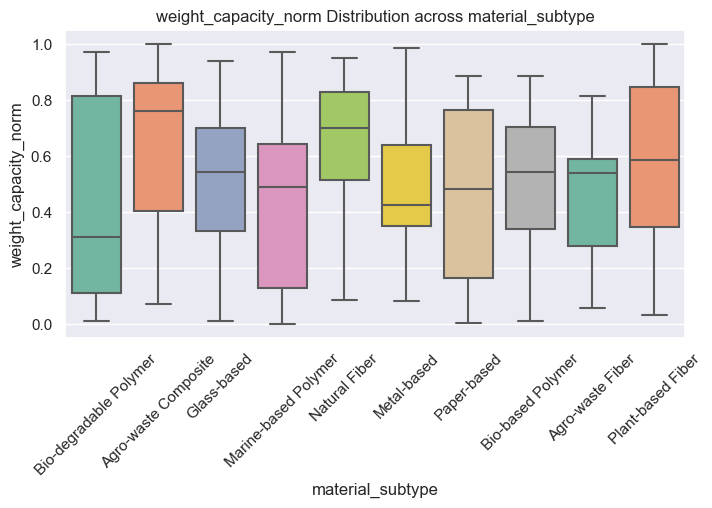

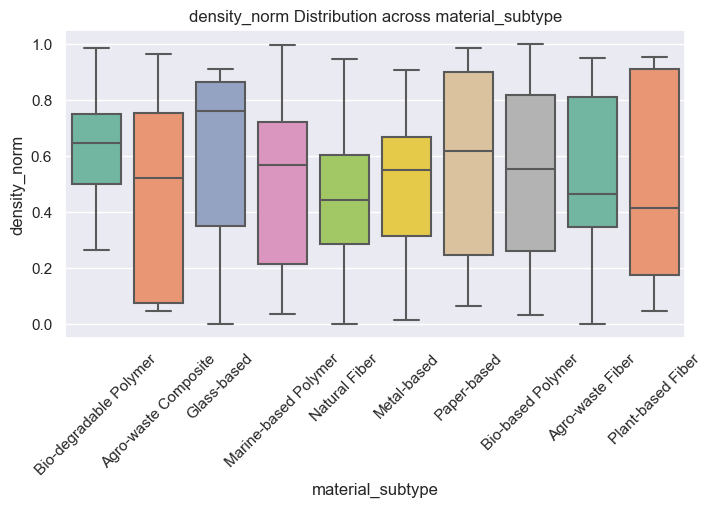

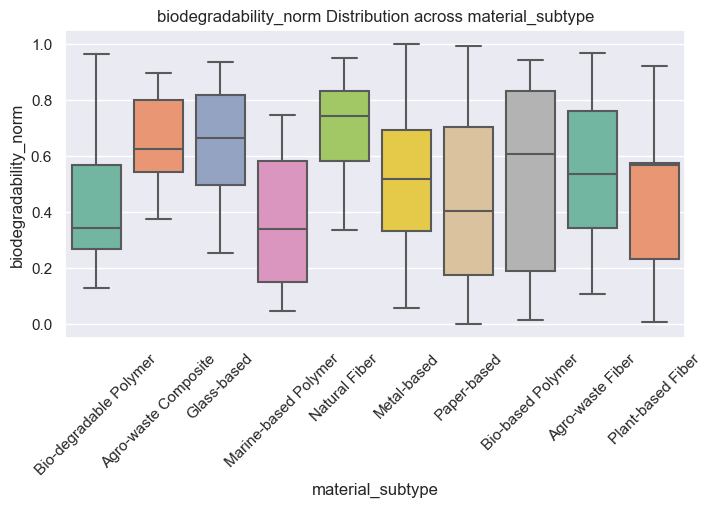

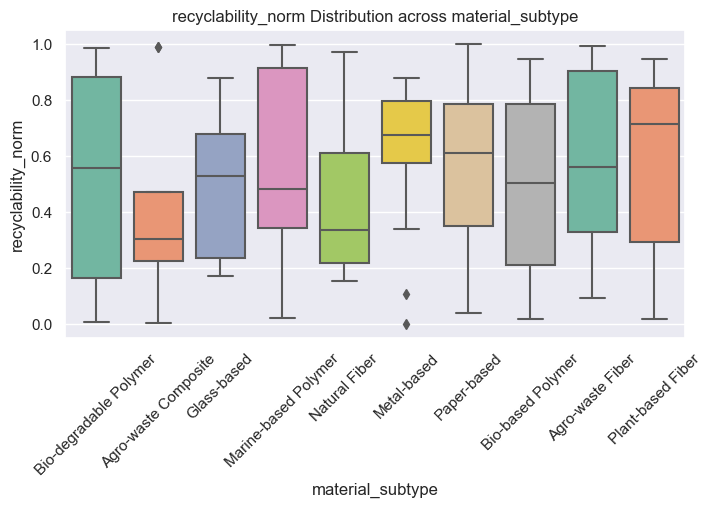

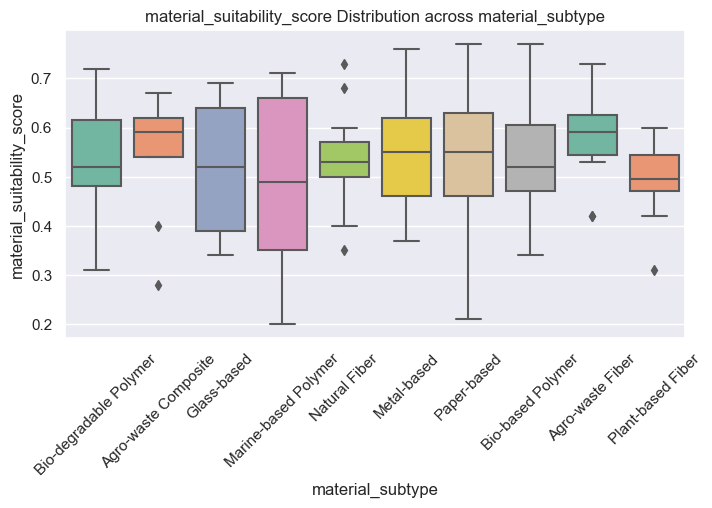

In [46]:

# =========================================================
# 15. CATEGORY-WISE BOXPLOTS (Categorical vs numeric)
# =========================================================

for cat in categorical_cols:
    for num in numeric_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[cat], y=df[num], palette="Set2")
        plt.title(f"{num} Distribution across {cat}")
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
# =========================================================
# 16. MISSING VALUE PERCENTAGE BAR CHART (CLEAN + CORRECT)
# =========================================================

missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]  # show only columns that have missing values

if len(missing_percent) > 0:
    plt.close('all')

    fig, ax = plt.subplots(figsize=(10, 5))

    missing_percent.sort_values().plot(kind='barh', ax=ax)

    ax.set_title("Missing Values Percentage", fontsize=14)
    ax.set_xlabel("Percentage (%)")

    fig.tight_layout()
    plt.show()

else:
    print("No missing values found — skipping missing value plot.")

No missing values found — skipping missing value plot.


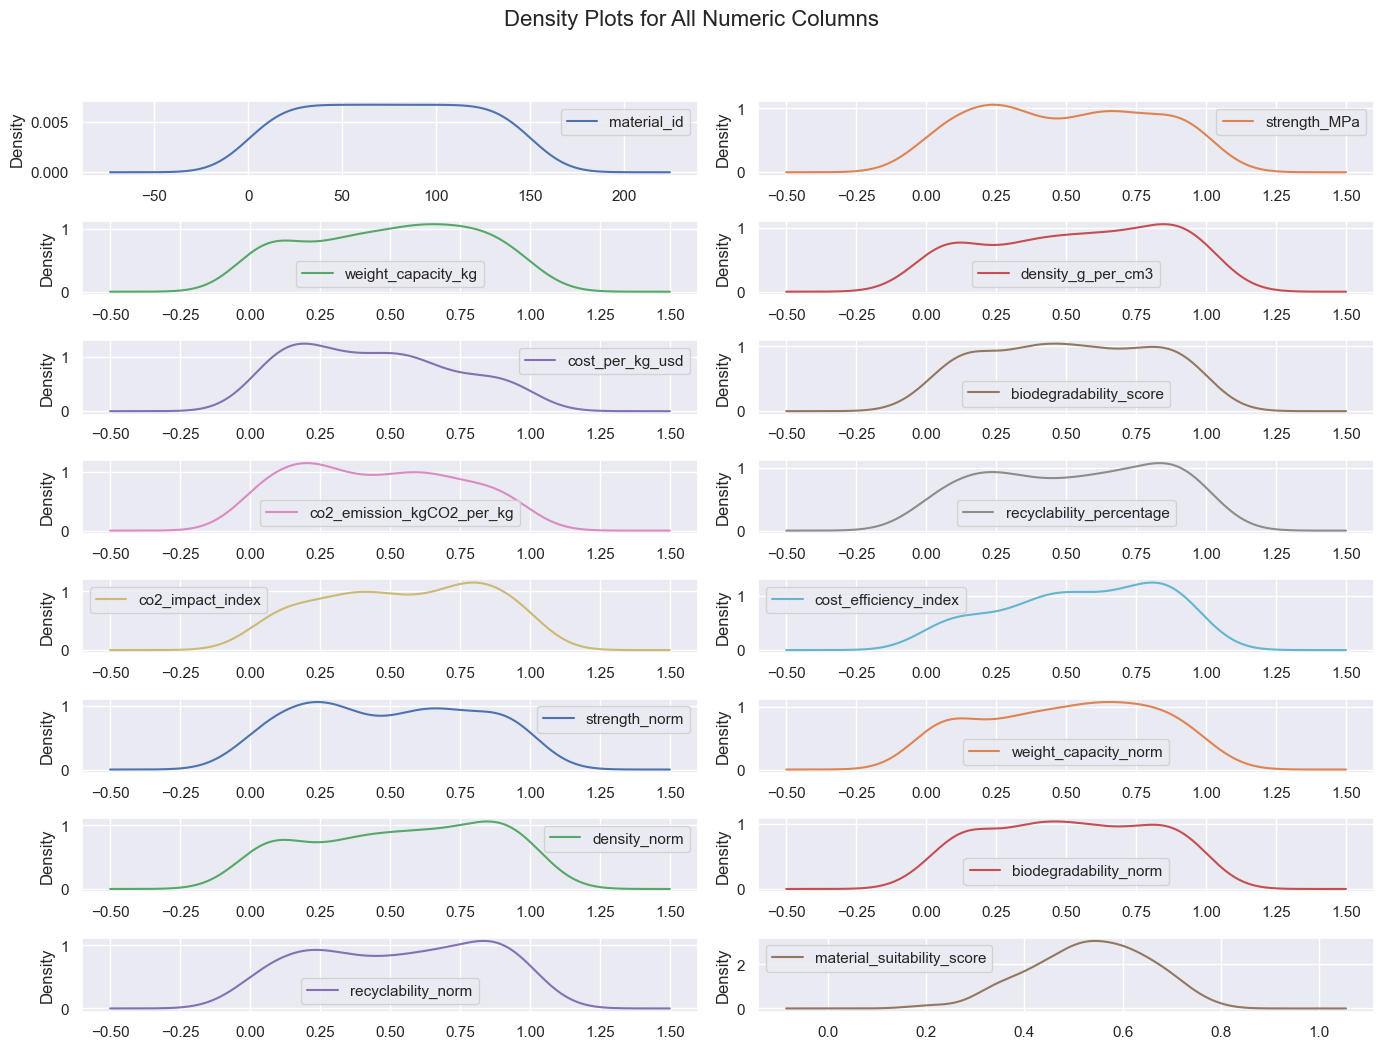

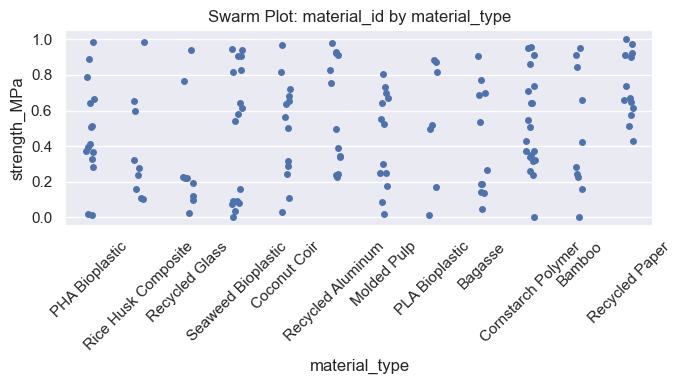

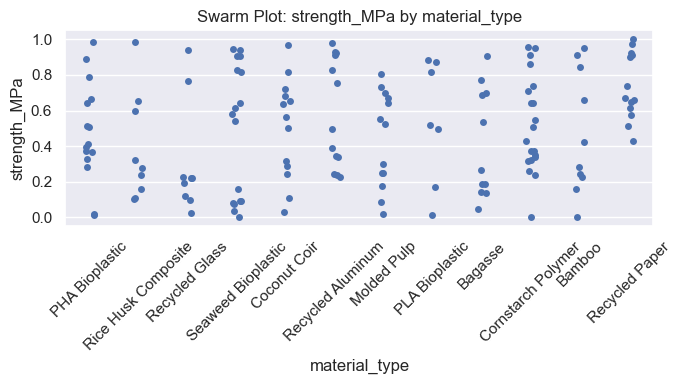

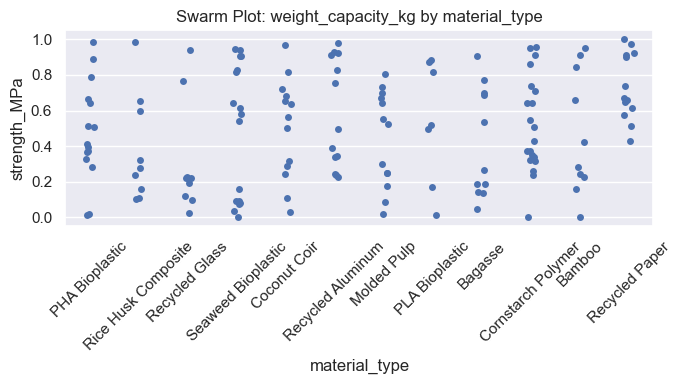

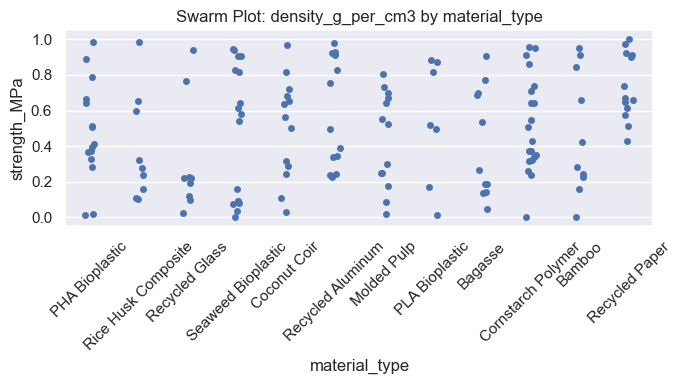

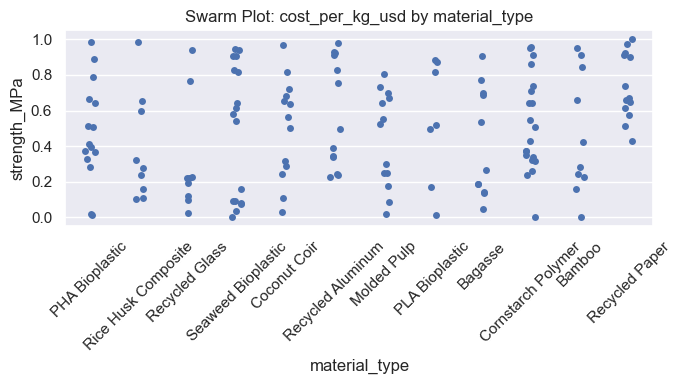

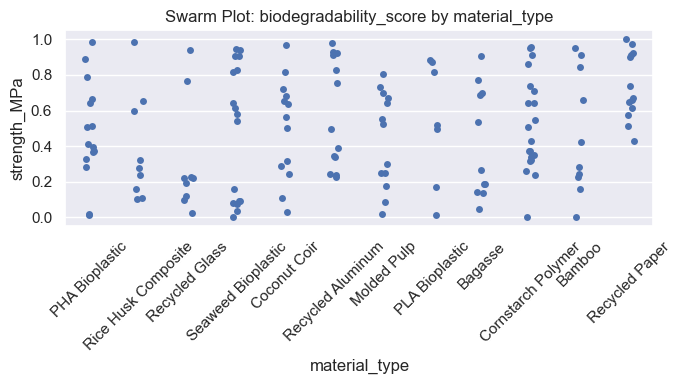

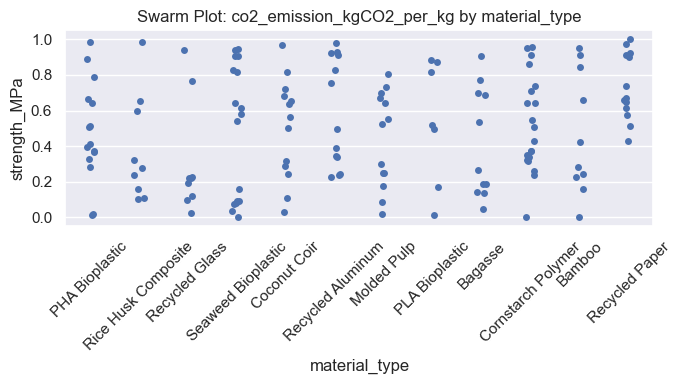

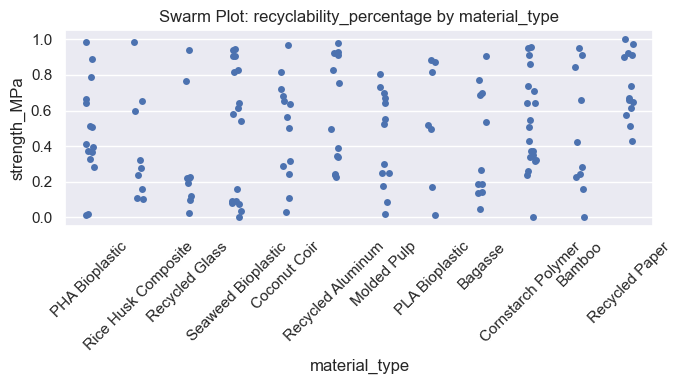

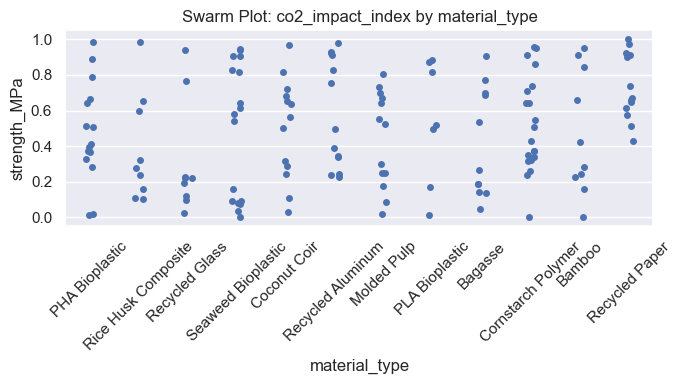

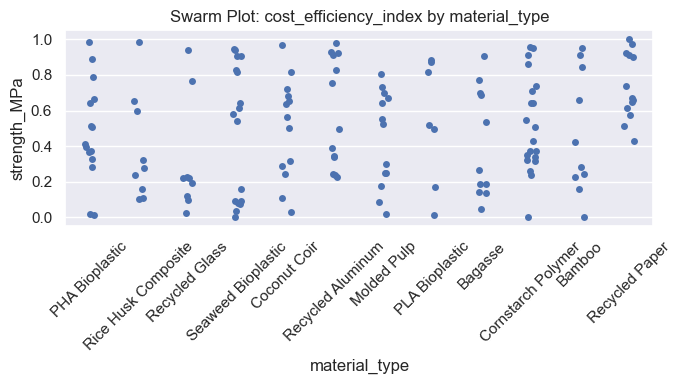

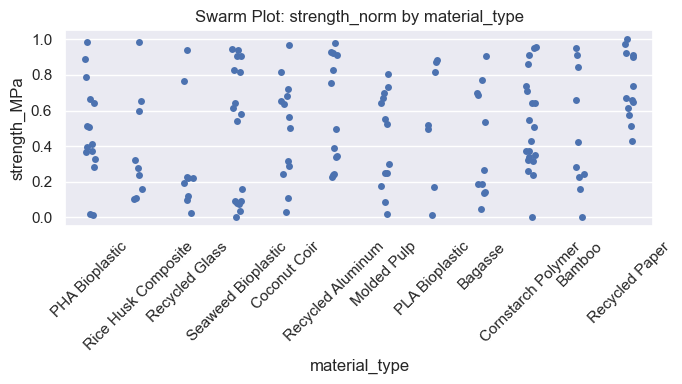

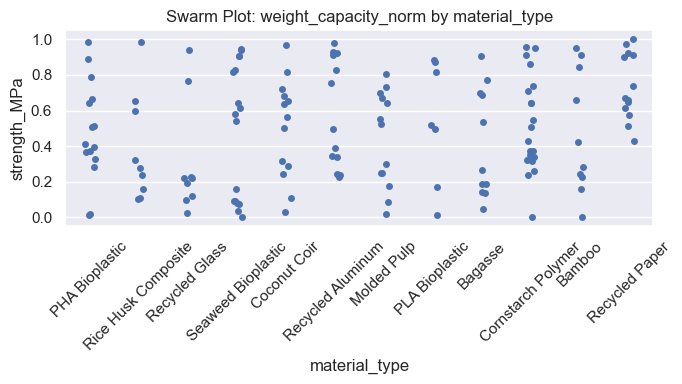

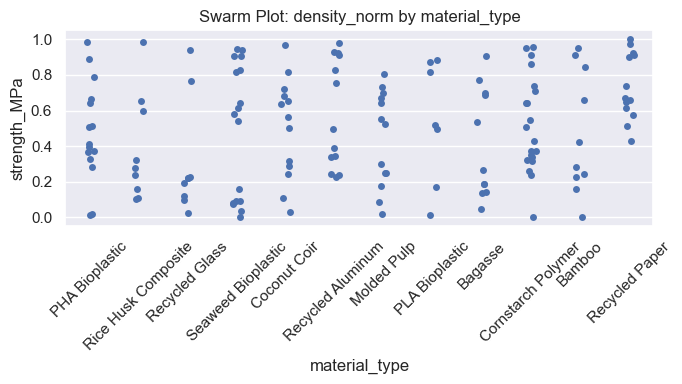

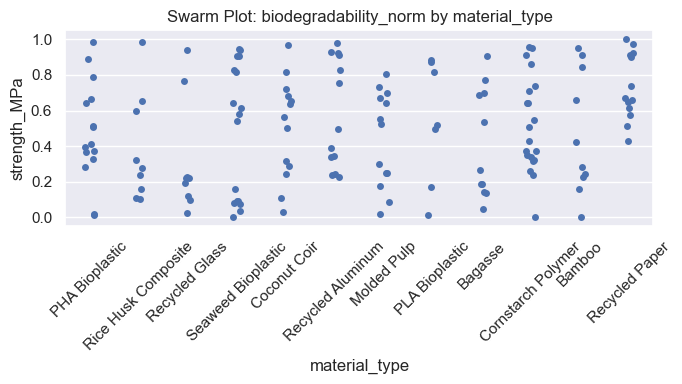

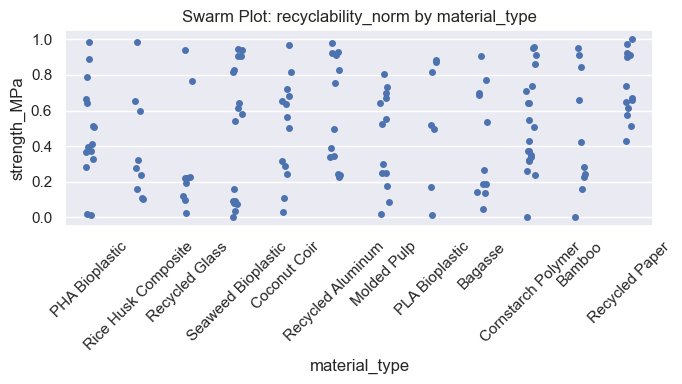

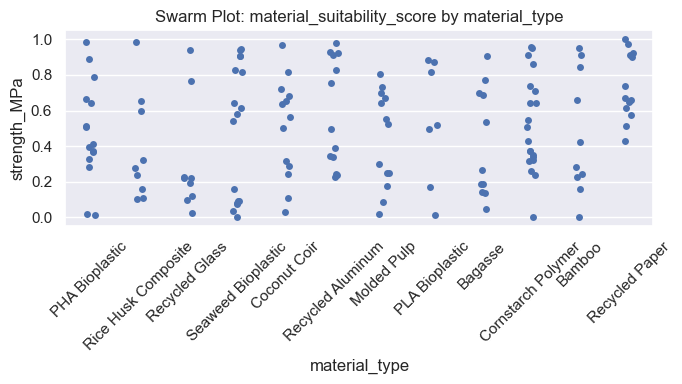

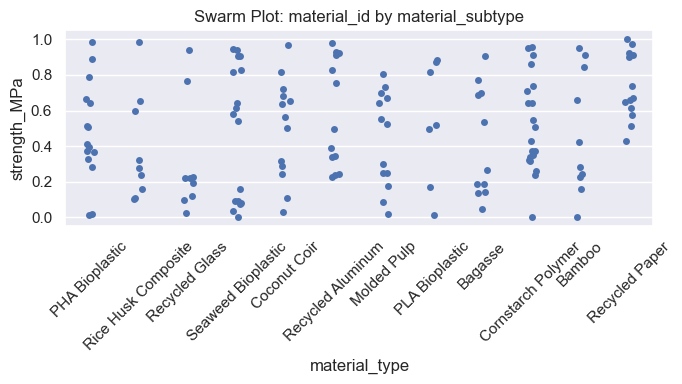

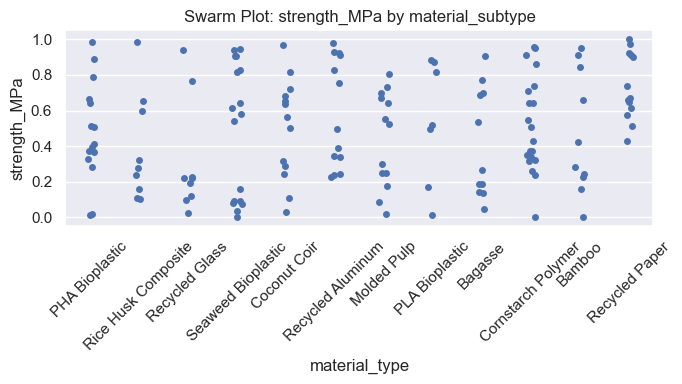

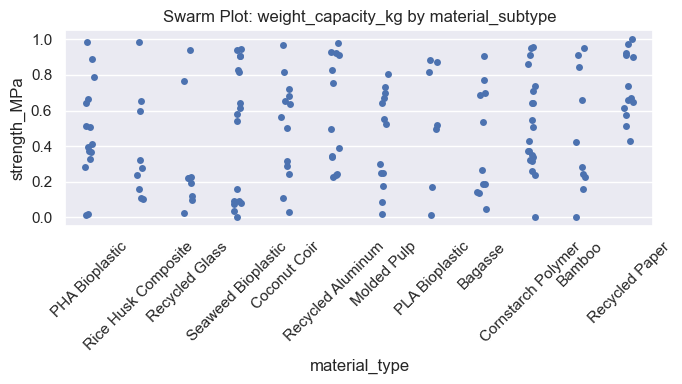

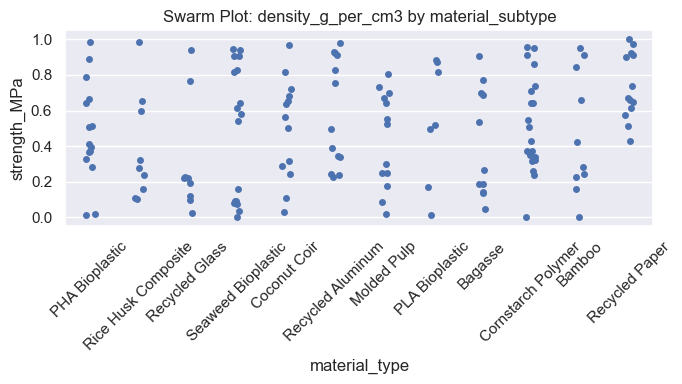

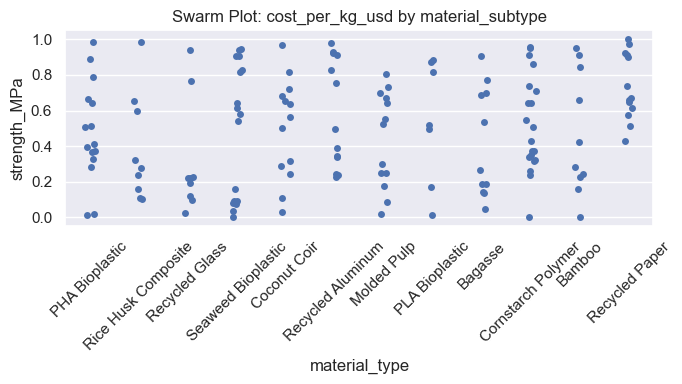

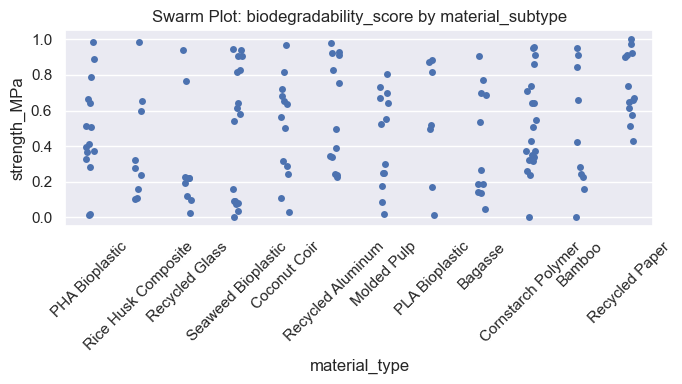

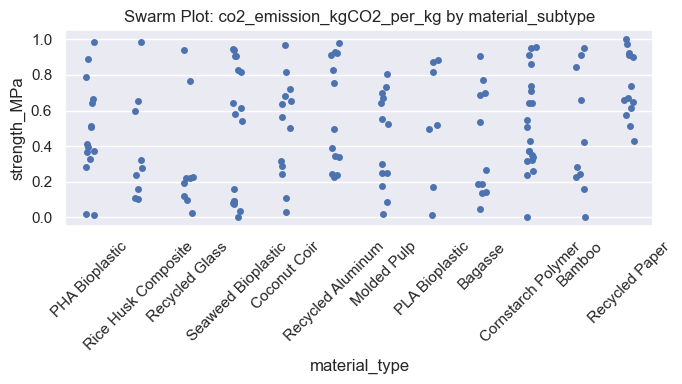

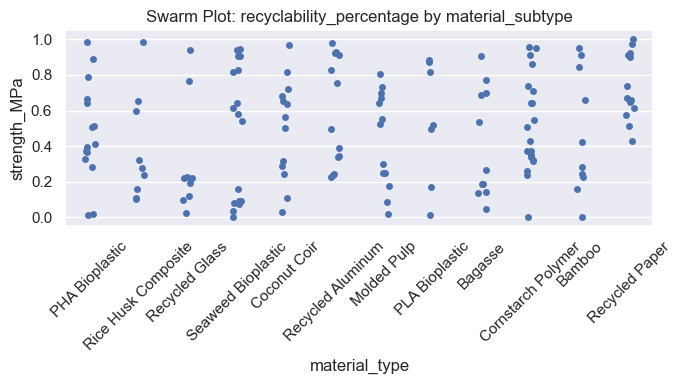

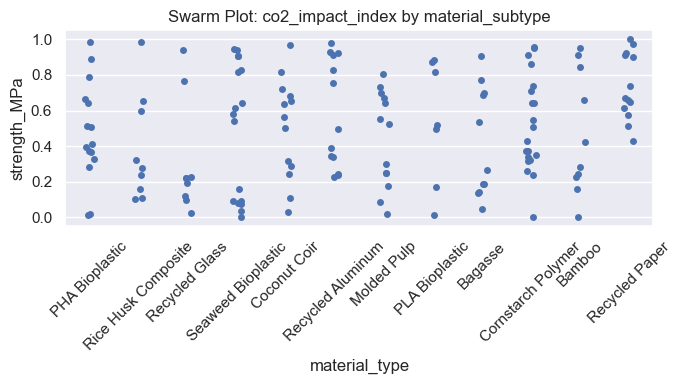

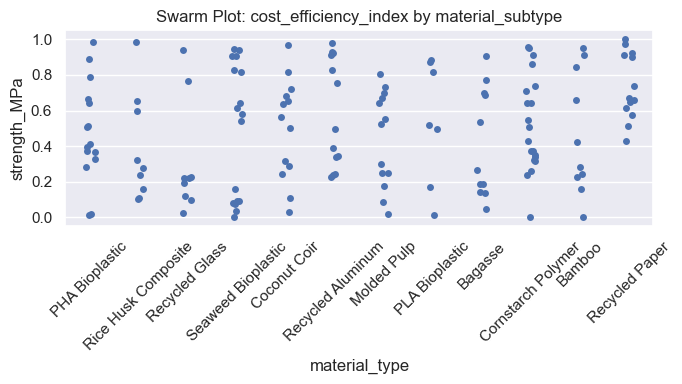

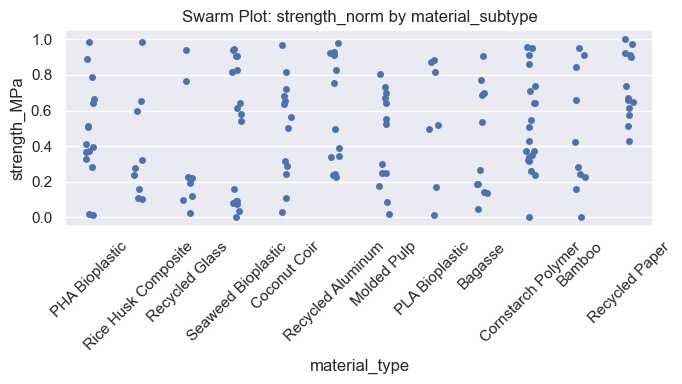

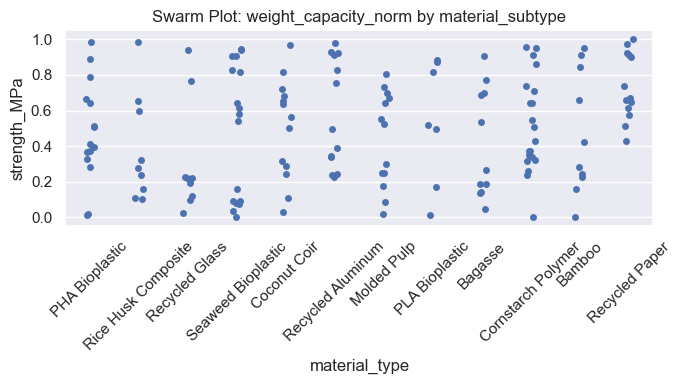

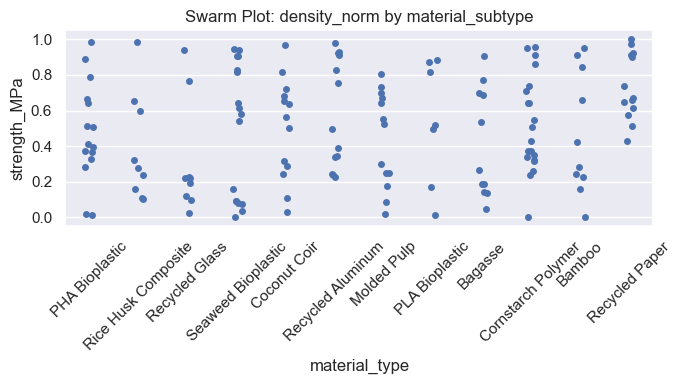

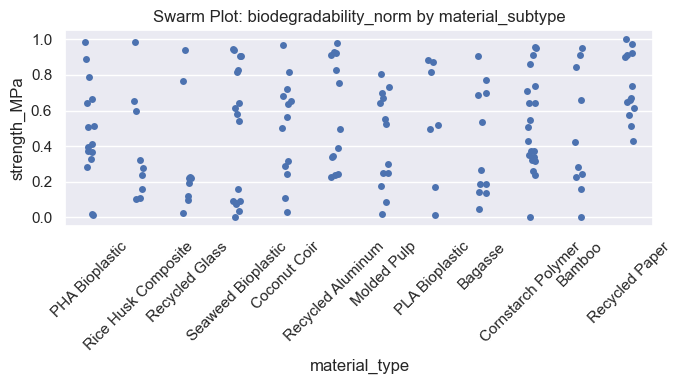

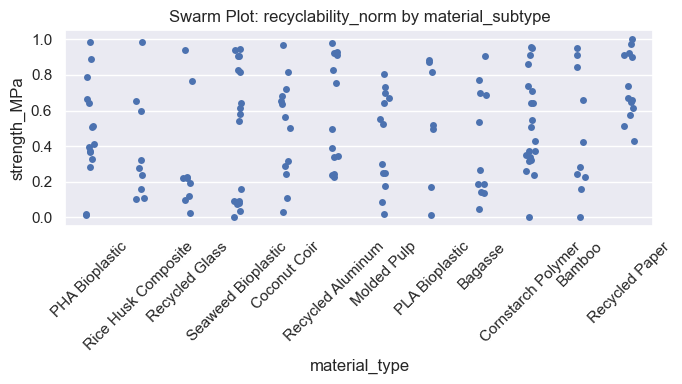

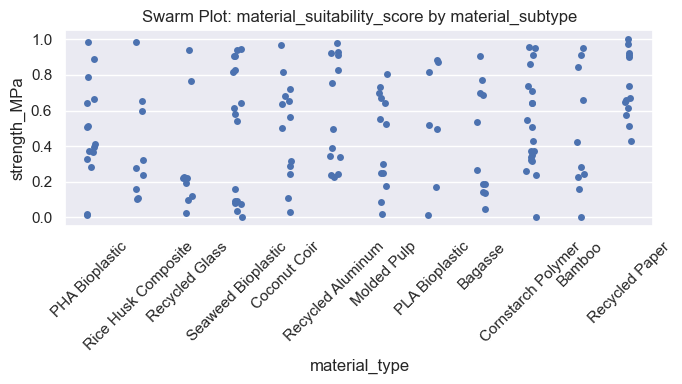

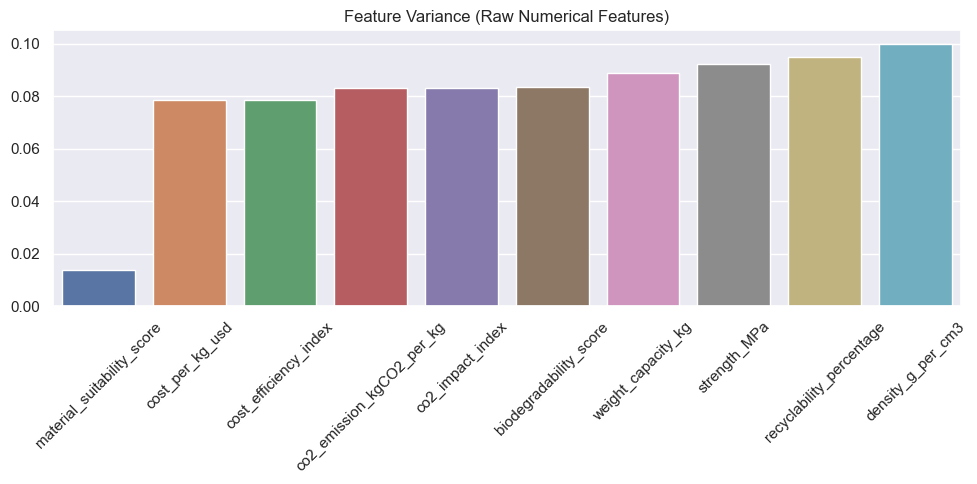

In [50]:

# -------- 17. DENSITY PLOT GRID (fixed layout) ----------
# pandas .plot(..., subplots=True) returns an array of Axes inside its own Figure.
# Capture that figure and use rect in tight_layout to leave room for the suptitle.
if len(numeric_cols) > 0:
    density_fig = df[numeric_cols].plot(
        kind='density',
        subplots=True,
        layout=(max(1, (len(numeric_cols)//2 + 1)), 2),
        figsize=(14, 12),
        sharex=False
    ).ravel()  # returns array-like of Axes; .ravel() ensures consistent handling

    # Use current figure to add suptitle and tighten layout with margin for the title.
    fig = plt.gcf()
    fig.suptitle("Density Plots for All Numeric Columns", fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    plt.close(fig)


# =========================================================
# 18. SWARM PLOTS (Categorical vs Numeric Outlier Detection)
# =========================================================

for cat in categorical_cols:
    for num in numeric_cols:
        plt.figure(figsize=(7,4))
        sns.stripplot(x='material_type', y='strength_MPa', data=df, jitter=True)
        plt.title(f"Swarm Plot: {num} by {cat}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



# =========================================================
# 19. HEATMAP OF FEATURE VARIANCE
# =========================================================

raw_numeric_features = [
    'weight_capacity_kg',
    'biodegradability_score',
    'cost_efficiency_index',
    'co2_impact_index',
    'material_suitability_score',
    'co2_emission_kgCO2_per_kg',
    'strength_MPa',
    'recyclability_percentage',
    'cost_per_kg_usd',
    'density_g_per_cm3'
]

variance = df[raw_numeric_features].var().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=variance.index, y=variance.values)
plt.title("Feature Variance (Raw Numerical Features)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




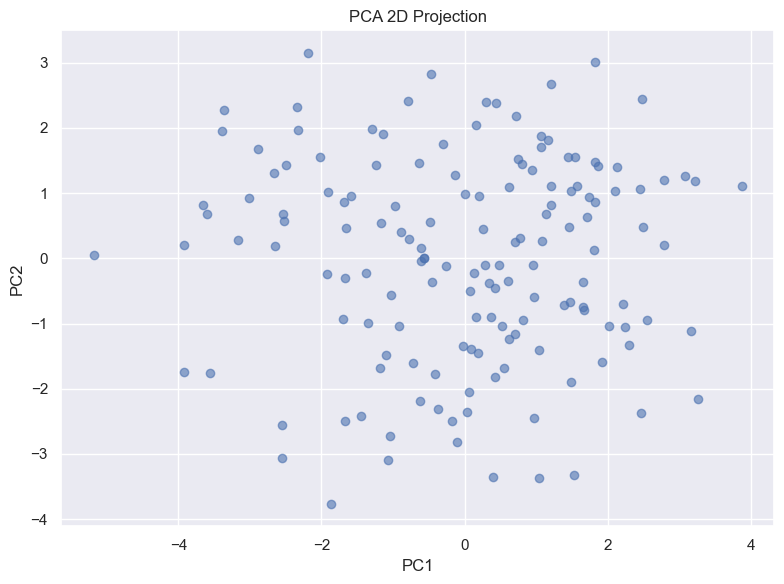

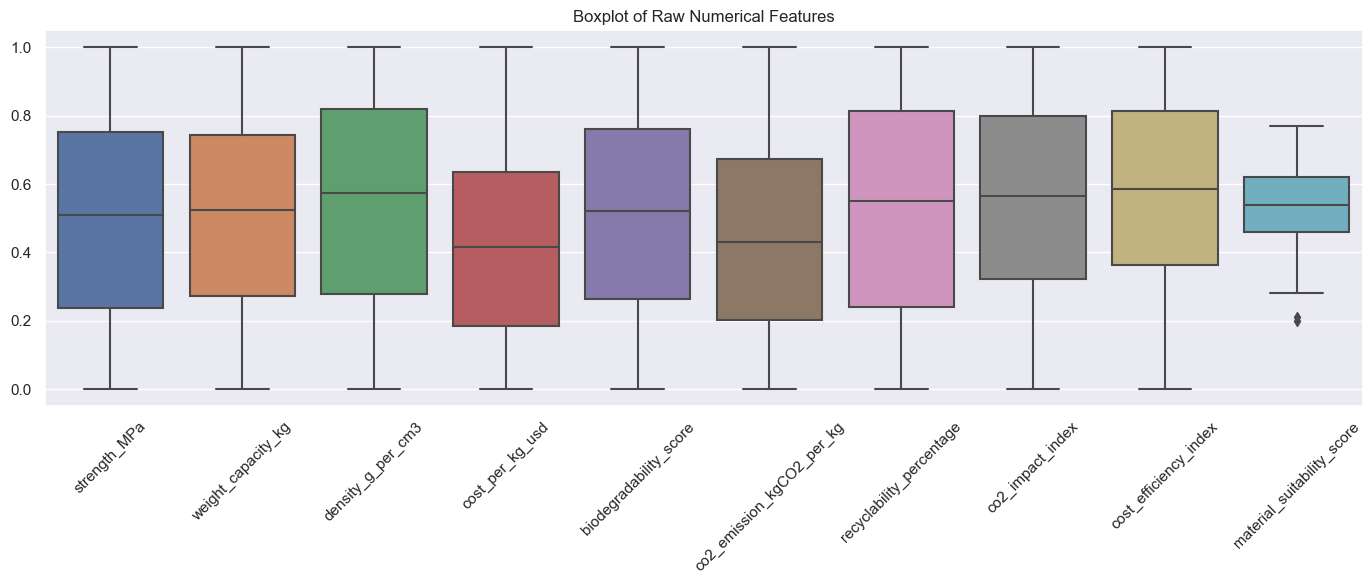

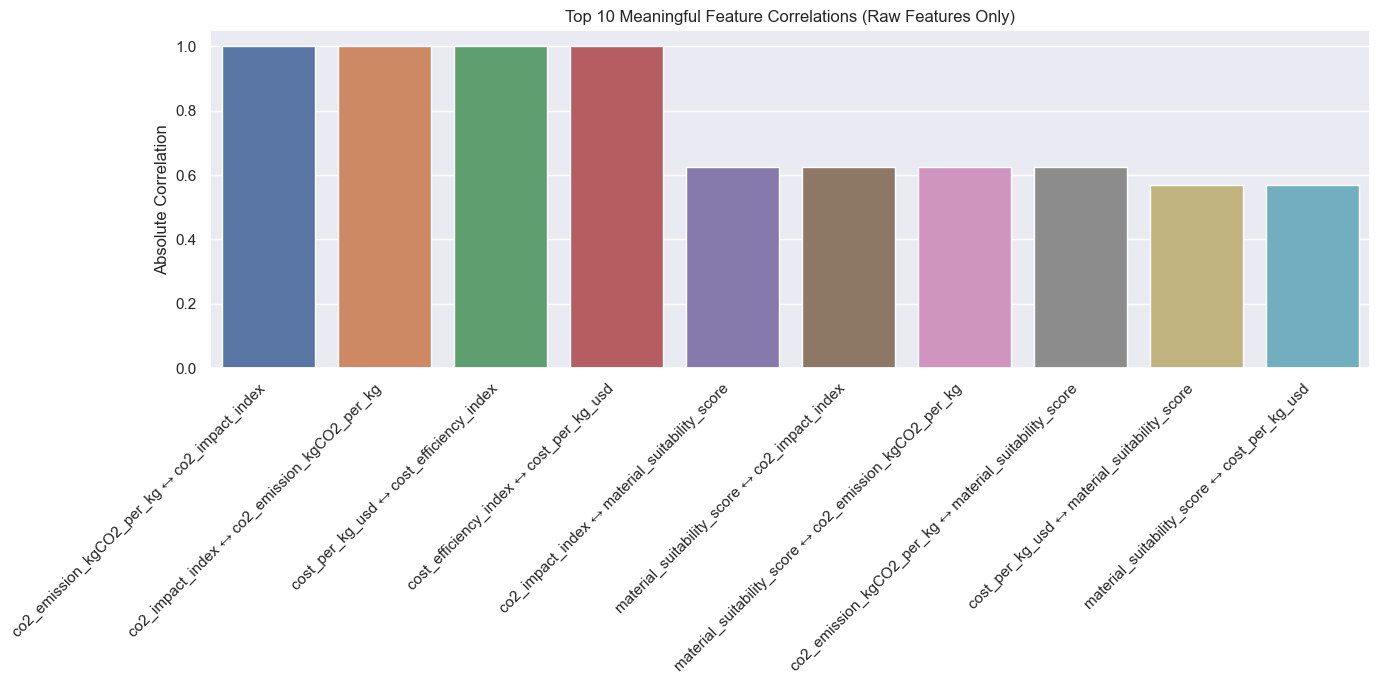

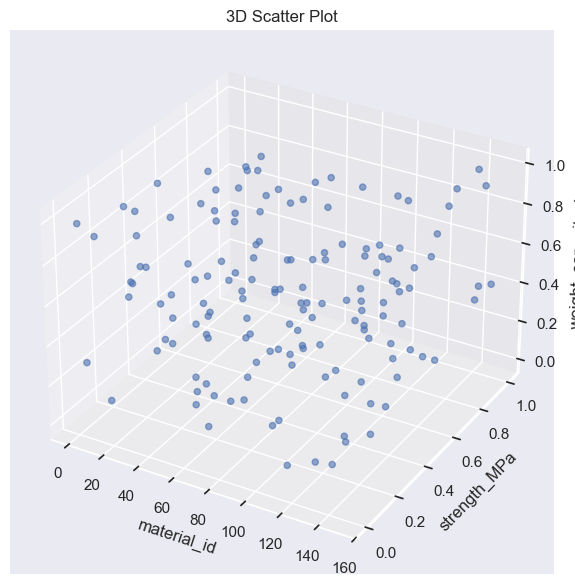

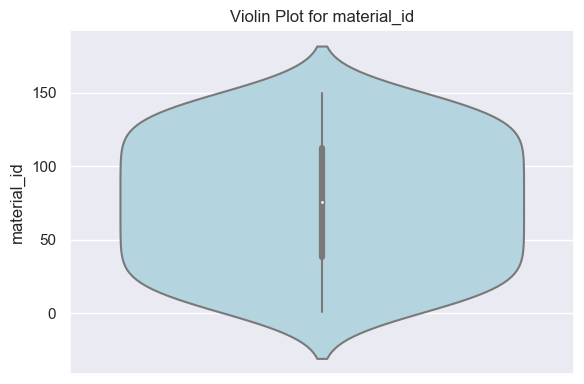

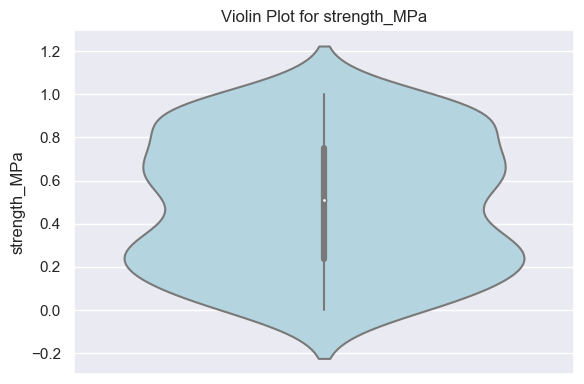

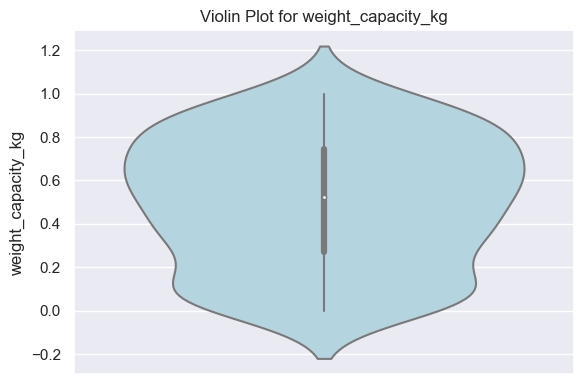

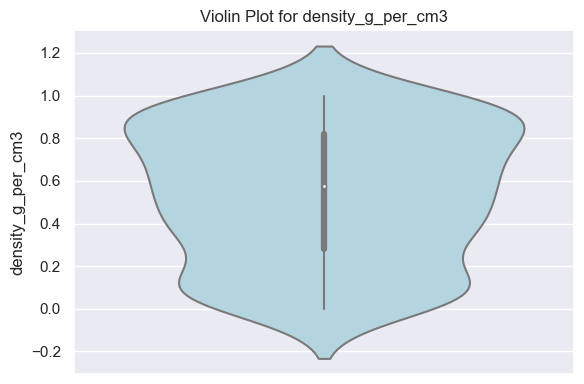

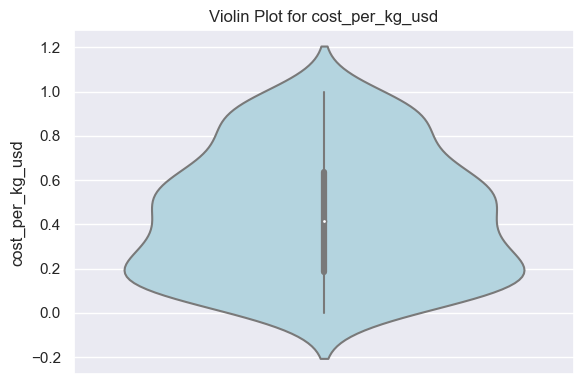

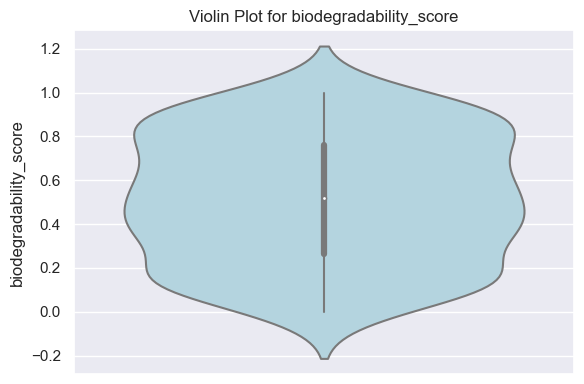

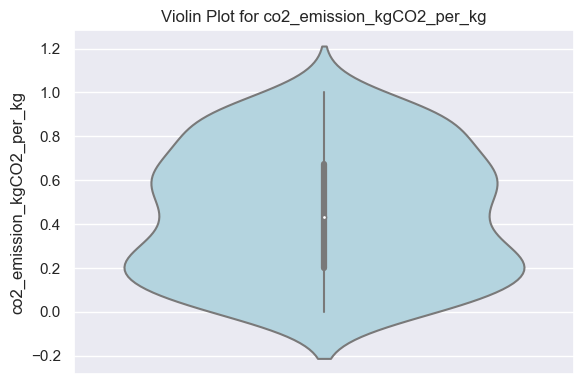

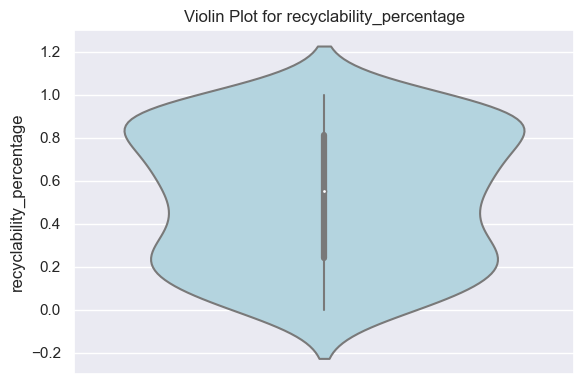

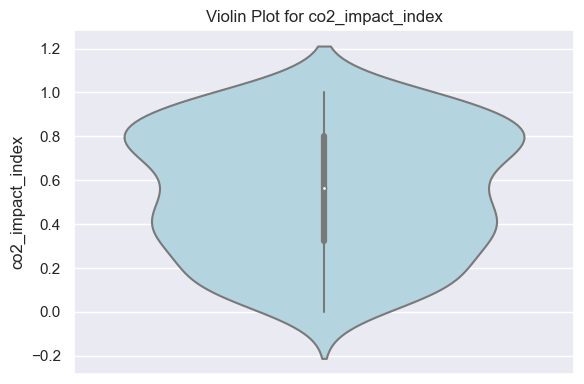

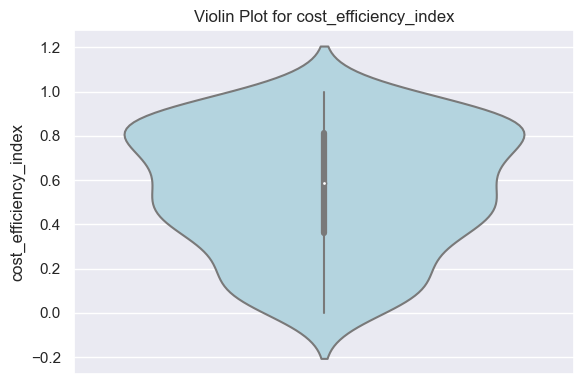

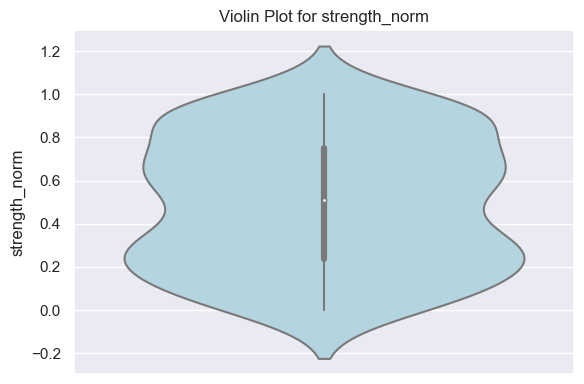

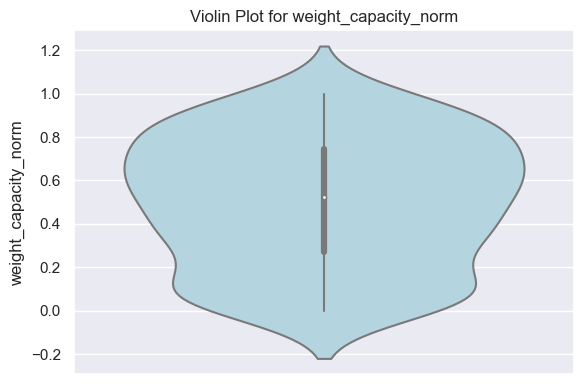

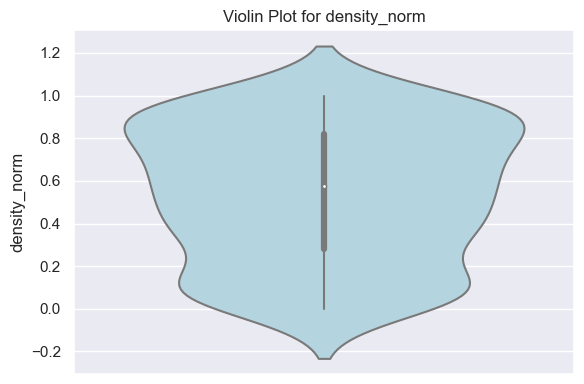

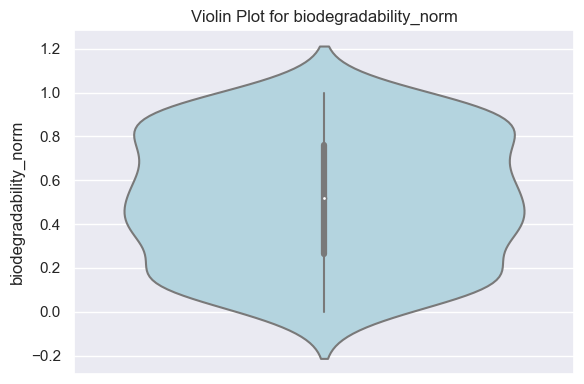

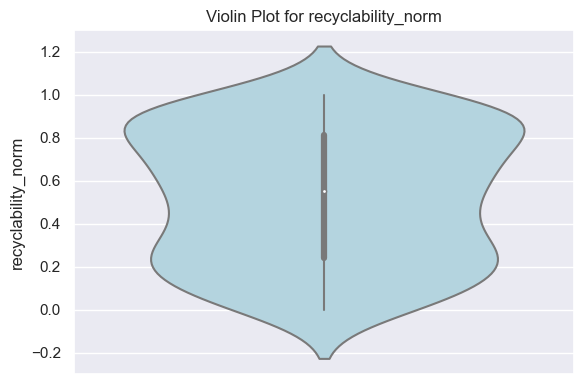

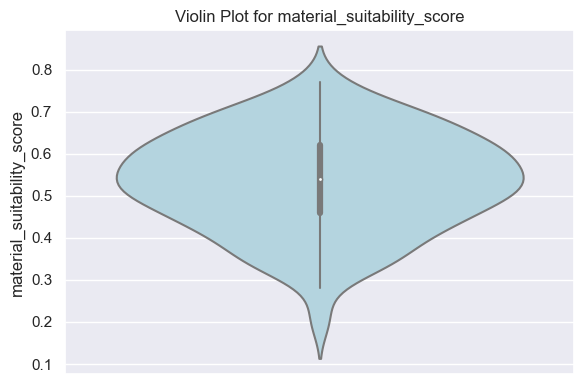

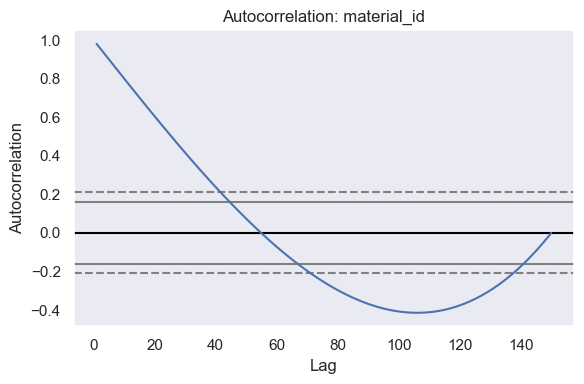

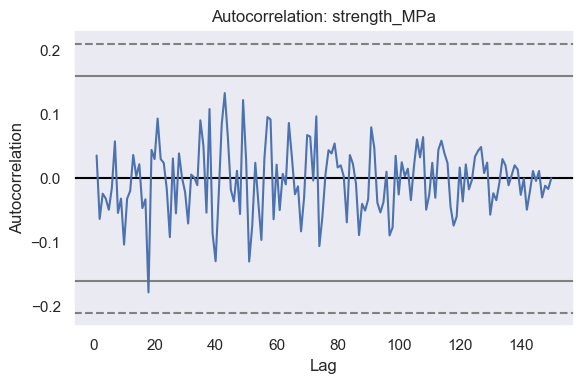

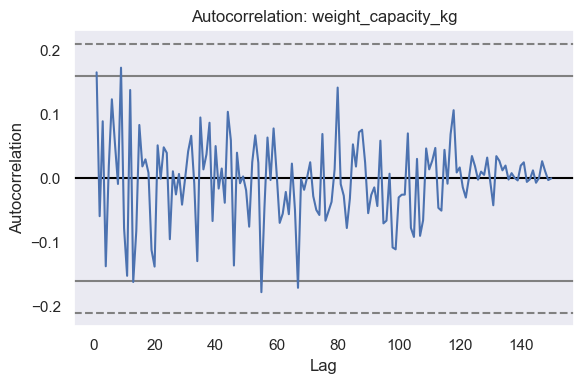

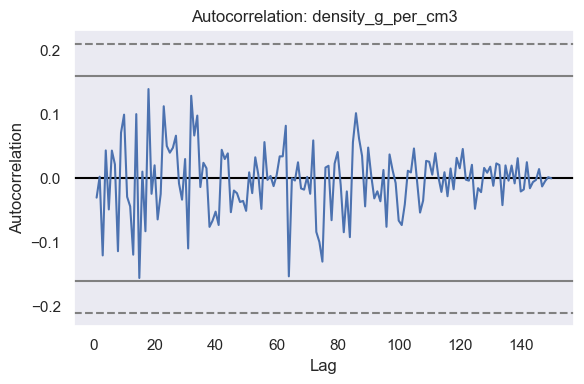

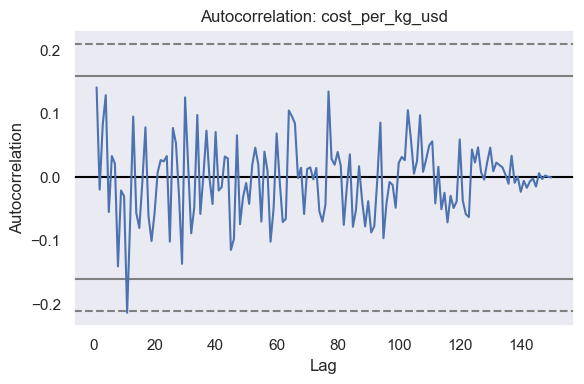

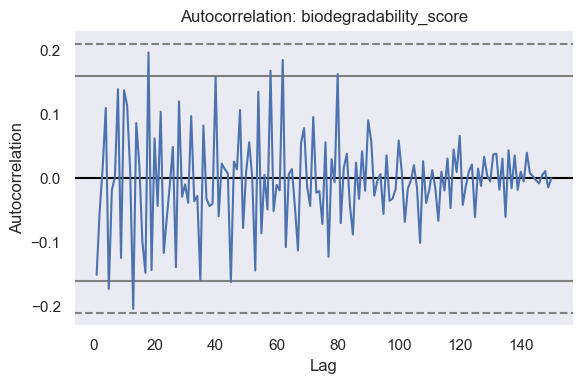

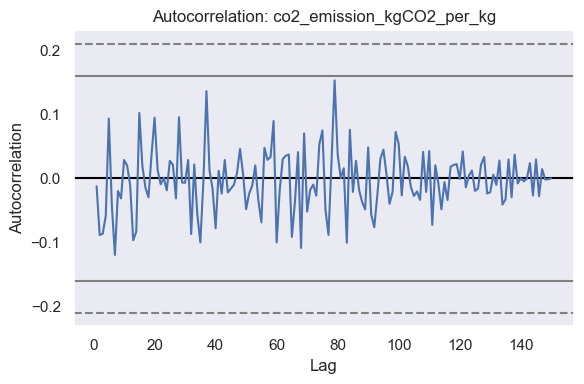

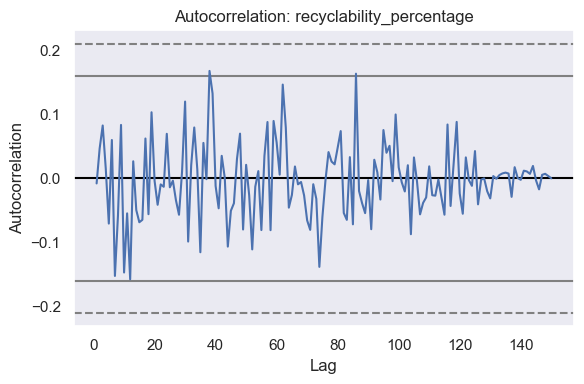

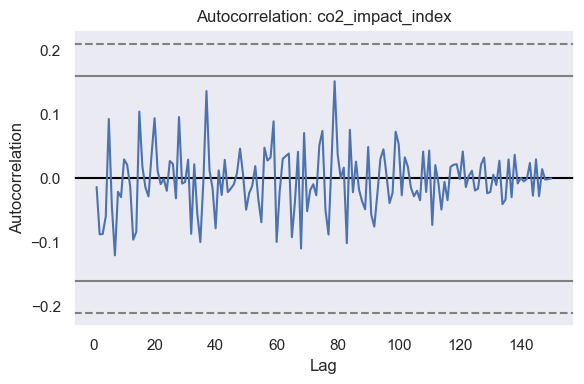

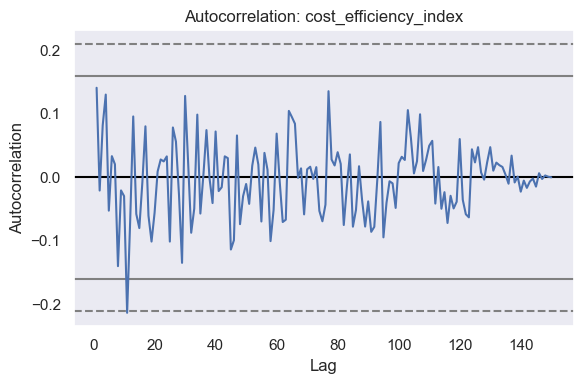

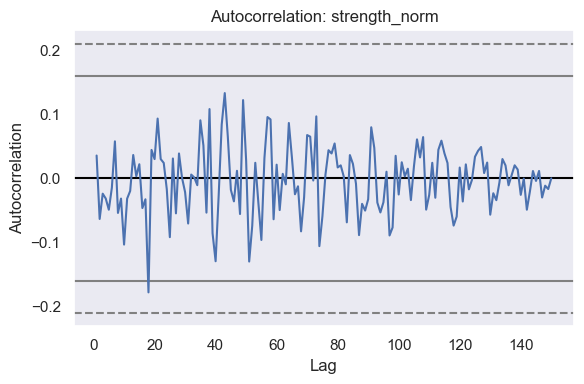

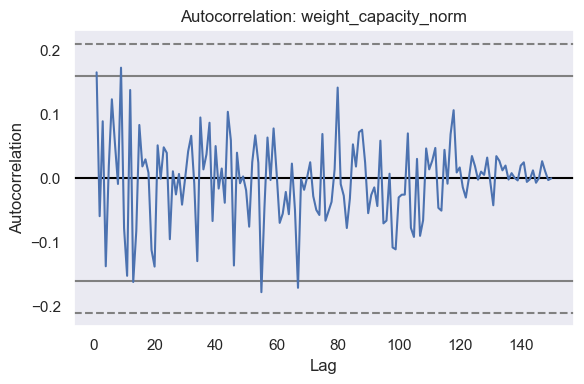

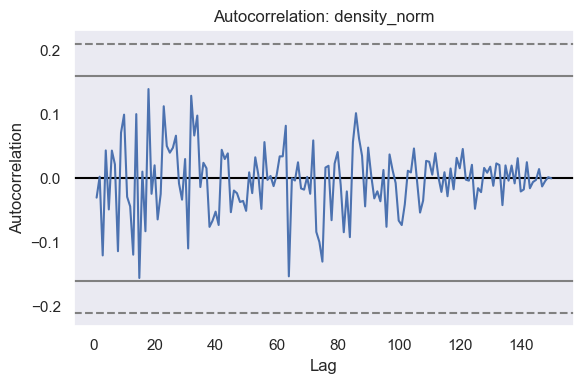

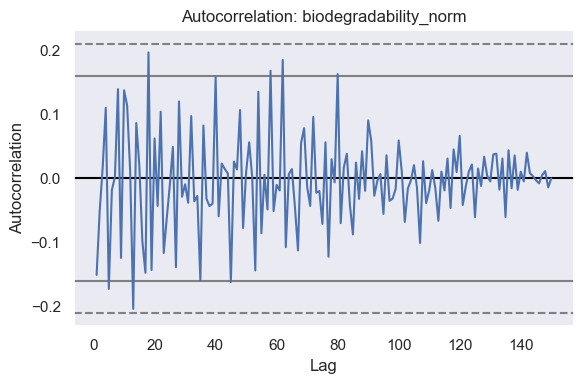

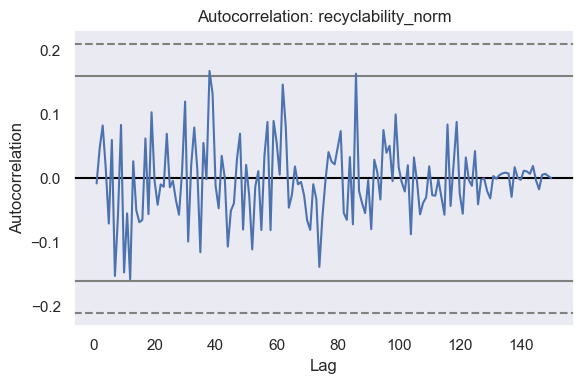

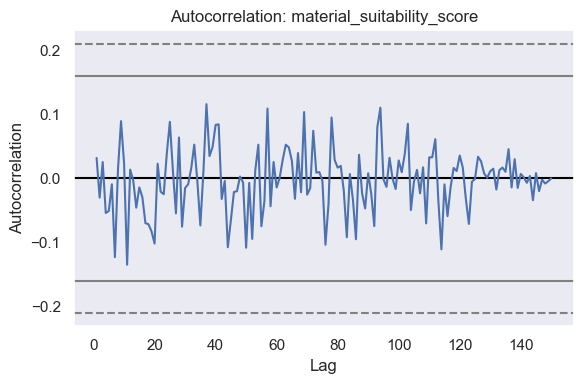

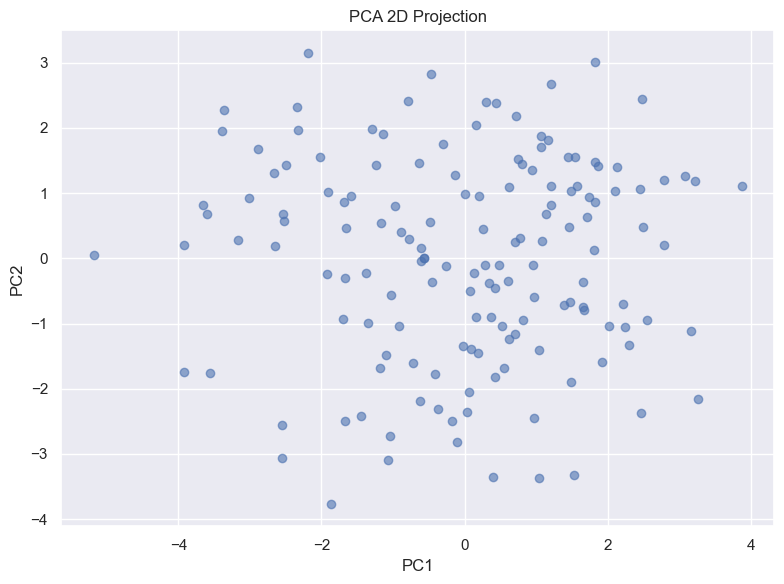

In [52]:


# =========================================================
# 20. PCA 2D PLOT (If numeric > 2)
# =========================================================

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

if len(numeric_cols) > 2:
    scaled = StandardScaler().fit_transform(df[numeric_cols])

    pca = PCA(n_components=2)
    pcs = pca.fit_transform(scaled)

    plt.figure(figsize=(8,6))
    plt.scatter(pcs[:,0], pcs[:,1], alpha=0.6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA 2D Projection")
    plt.tight_layout()
    plt.show()


# =========================================================
# 21. BOXPLOT MATRIX (All numeric features)
# =========================================================

raw_numeric_features = [
    'strength_MPa',
    'weight_capacity_kg',
    'density_g_per_cm3',
    'cost_per_kg_usd',
    'biodegradability_score',
    'co2_emission_kgCO2_per_kg',
    'recyclability_percentage',
    'co2_impact_index',
    'cost_efficiency_index',
    'material_suitability_score'
]

plt.figure(figsize=(14,6))
sns.boxplot(data=df[raw_numeric_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Raw Numerical Features")
plt.tight_layout()
plt.show()



# =========================================================
# 22. CORRELATION HEATMAP (Top 10 highest correlations)
# =========================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select ONLY raw continuous numerical features
raw_numeric_features = [
    'strength_MPa',
    'weight_capacity_kg',
    'density_g_per_cm3',
    'cost_per_kg_usd',
    'biodegradability_score',
    'co2_emission_kgCO2_per_kg',
    'recyclability_percentage',
    'co2_impact_index',
    'cost_efficiency_index',
    'material_suitability_score'
]

numeric_df = df[raw_numeric_features]

# 2. Compute absolute correlation matrix
corr = numeric_df.corr().abs()

# 3. Remove self-correlations and extract top 10
corr_unstacked = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))
        .unstack()
        .dropna()
        .sort_values(ascending=False)
)

top_corr = corr_unstacked.head(10)

# 4. Plot top 10 correlations
plt.figure(figsize=(14,7))
sns.barplot(
    x=[f"{i[0]} ↔ {i[1]}" for i in top_corr.index],
    y=top_corr.values
)
plt.title("Top 10 Meaningful Feature Correlations (Raw Features Only)")
plt.ylabel("Absolute Correlation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# =========================================================
# 23. 3D SCATTER PLOT (If ≥3 numeric features)
# =========================================================

if len(numeric_cols) >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(
        df[numeric_cols[0]],
        df[numeric_cols[1]],
        df[numeric_cols[2]],
        alpha=0.6
    )

    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.title("3D Scatter Plot")
    plt.tight_layout()
    plt.show()


# =========================================================
# 24. VIOLIN GRID PLOTS
# =========================================================

for num in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, y=num, color="lightblue")
    plt.title(f"Violin Plot for {num}")
    plt.tight_layout()
    plt.show()


# -------- 25. AUTOCORRELATION PLOTS (explicit figures) ----------
# autocorrelation_plot creates its own figure; create/clear explicitly to avoid blank figs.
for col in numeric_cols:
    plt.close("all")
    fig_ac = plt.figure(figsize=(6,4))
    ax_ac = fig_ac.add_subplot(111)
    autocorrelation_plot(df[col].dropna(), ax=ax_ac)
    ax_ac.set_title(f"Autocorrelation: {col}")
    fig_ac.tight_layout()
    plt.show()
    plt.close(fig_ac)

# -------- extra: safe PCA block (keeps figure control consistent) ----------
if len(numeric_cols) > 2:
    scaled = StandardScaler().fit_transform(df[numeric_cols].dropna())
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(scaled)

    fig_pca = plt.figure(figsize=(8,6))
    ax_pca = fig_pca.add_subplot(111)
    ax_pca.scatter(pcs[:,0], pcs[:,1], alpha=0.6)
    ax_pca.set_xlabel("PC1")
    ax_pca.set_ylabel("PC2")
    ax_pca.set_title("PCA 2D Projection")
    fig_pca.tight_layout()
    plt.show()
    plt.close(fig_pca)